#<center>**Anomaly Detection Visualization**</center>

<center>

![picture](https://www.pinclipart.com/picdir/big/156-1568617_anomaly-and-fraud-detection-anomaly-detection-clipart-png.png)
</center>

**Import libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load all 10 datasets**

In [2]:
df_1 = pd.read_csv('isolation_forest_current_1.csv', delimiter = ',')
df_2 = pd.read_csv('isolation_forest_current_2.csv', delimiter = ',')
df_3 = pd.read_csv('isolation_forest_current_3.csv', delimiter = ',')
df_4 = pd.read_csv('isolation_forest_current_4.csv', delimiter = ',')
df_5 = pd.read_csv('isolation_forest_current_5.csv', delimiter = ',')
df_6 = pd.read_csv('isolation_forest_current_6.csv', delimiter = ',')
df_7 = pd.read_csv('isolation_forest_current_7.csv', delimiter = ',')
df_8 = pd.read_csv('isolation_forest_current_8.csv', delimiter = ',')
df_9 = pd.read_csv('isolation_forest_current_9.csv', delimiter = ',')
df_10 = pd.read_csv('isolation_forest_current_10.csv', delimiter = ',')

**Examine data columns and rows**

In [3]:
df_1.head()

,Timestamp,Current (Ampere),scores,anomaly
0,2021-01-01 00:00:00,0,-0.074845,0
1,2021-01-01 00:05:00,0,-0.074845,0
2,2021-01-01 00:10:00,0,-0.074845,0
3,2021-01-01 00:15:00,0,-0.074845,0
4,2021-01-01 00:20:00,0,-0.074845,0


**Extract day of week/hour/minute from timestamp to perform data analytics**

Create a variable df to store all the 10 dataframes for looping through the extraction process

In [4]:
df = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]

For loop to convert 'Timestamp' column to datetime format and extract the 3 columns "day_of_week", "hour", and "minute"

In [5]:
for df in df:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['day_of_week'] = df['Timestamp'].dt.day_name()
    df['hour'] = df['Timestamp'].dt.hour
    df['minute'] = df['Timestamp'].dt.minute

Examine the first dataframe to check the columns are extracted properly

In [6]:
df_1.head()

,Timestamp,Current (Ampere),scores,anomaly,day_of_week,hour,minute
0,2021-01-01 00:00:00,0,-0.074845,0,Friday,0,0
1,2021-01-01 00:05:00,0,-0.074845,0,Friday,0,5
2,2021-01-01 00:10:00,0,-0.074845,0,Friday,0,10
3,2021-01-01 00:15:00,0,-0.074845,0,Friday,0,15
4,2021-01-01 00:20:00,0,-0.074845,0,Friday,0,20


**Visualize and analyse the results for the 10 datasets**

**1) Descriptive Statistics**
- Computes a summary of statistics pertaining to the DataFrame columns
- Gives the mean, std and IQR values

**2) Distribution Plot**
- Flexibly plot a univariate distribution of observations
- Combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot (gaussian kernel density estimate)

**3) Scatterplot Visualization**
- **Red** dots represent **anomalous** data points
- **Blue** dots represent **normal** data points

<Note that the X-axis uses the **row index** instead of timestamp for **brevity**. They are essentially the same as the values are still **ordered by time** since the rows are **not shuffled**.>

**4) Patterns of Failure Analysis**
- Number of Anomalies Grouped by **Day of Week**
  - Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
- Number of Anomalies Grouped by **Hour**
  - 8-19 hr (interval = 1 hr)
  - Working hours: 8am-8pm (Assume that anomalies only appear during working hours where assets are used heavily and values might exceed threshold)
- Number of Anomalies Grouped by **Minute**
  - 0-55 min (interval = 5 min)

## Dataset 1

**Descriptive Statistics**

In [7]:
df_1.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,38.960125,0.000623,0.040883
std,18.221610,0.068867,0.198029
min,0.000000,-0.239453,0.000000
25%,35.000000,-0.074845,0.000000
50%,45.000000,0.012614,0.000000
75%,50.000000,0.060848,0.000000
max,73.000000,0.075398,1.000000


**Distribution Plot**

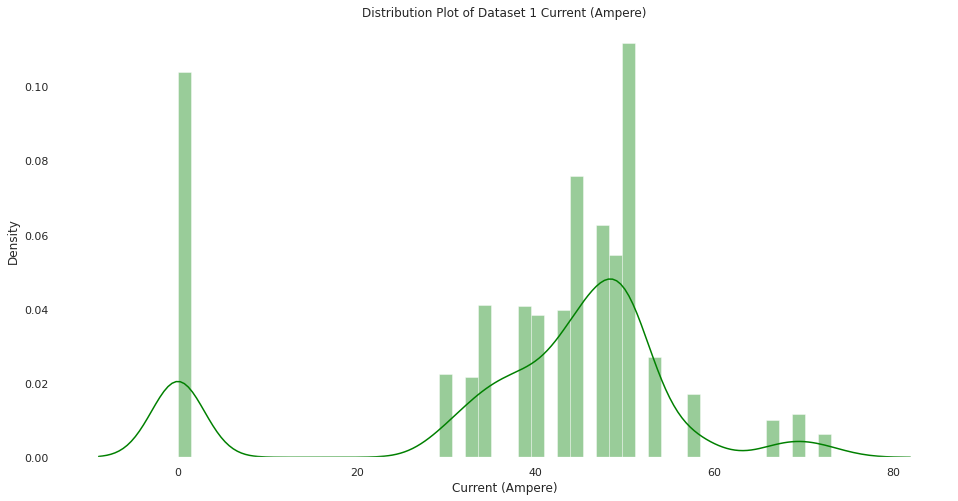

In [8]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_1["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 1 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

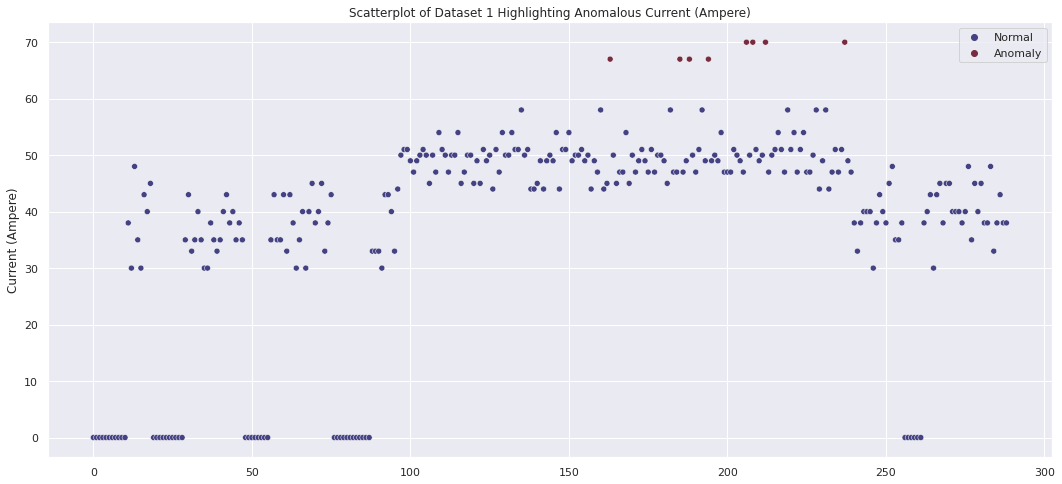

In [9]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_1.index,
                y = df_1['Current (Ampere)'].loc[0:288],
                hue = df_1['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 1 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

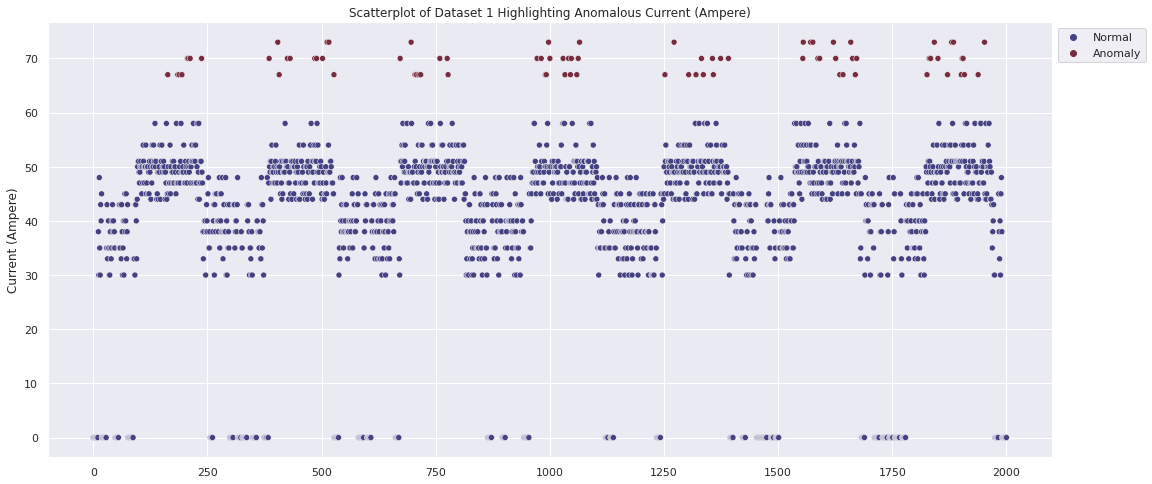

In [10]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_1.index,
                y = df_1['Current (Ampere)'].loc[0:2000],
                hue = df_1['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 1 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

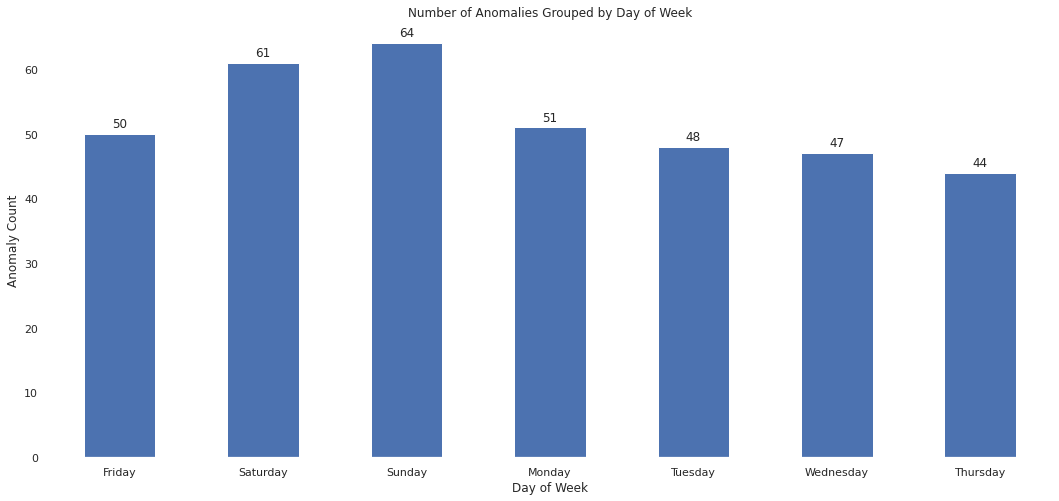

In [11]:
ax = df_1[df_1['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
ax.set_facecolor('white')
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

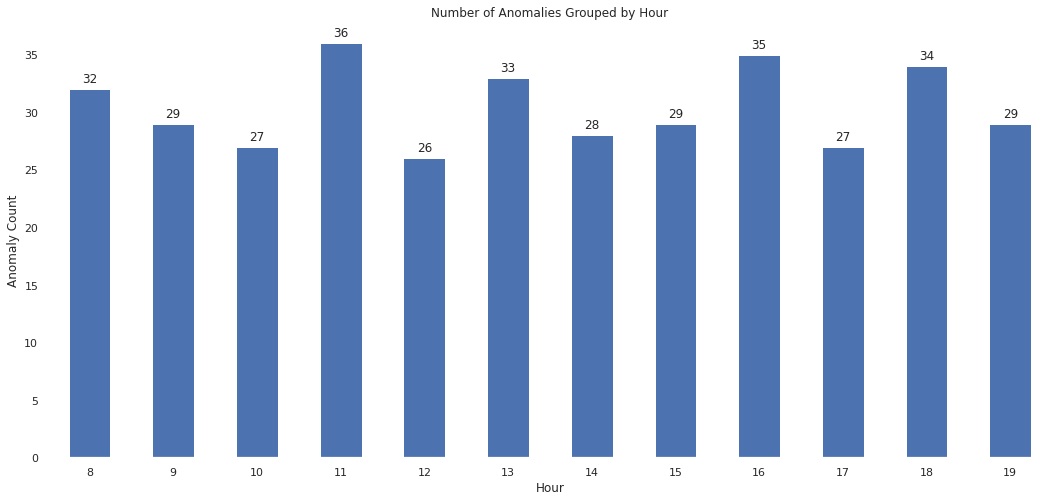

In [12]:
ax = df_1[df_1['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

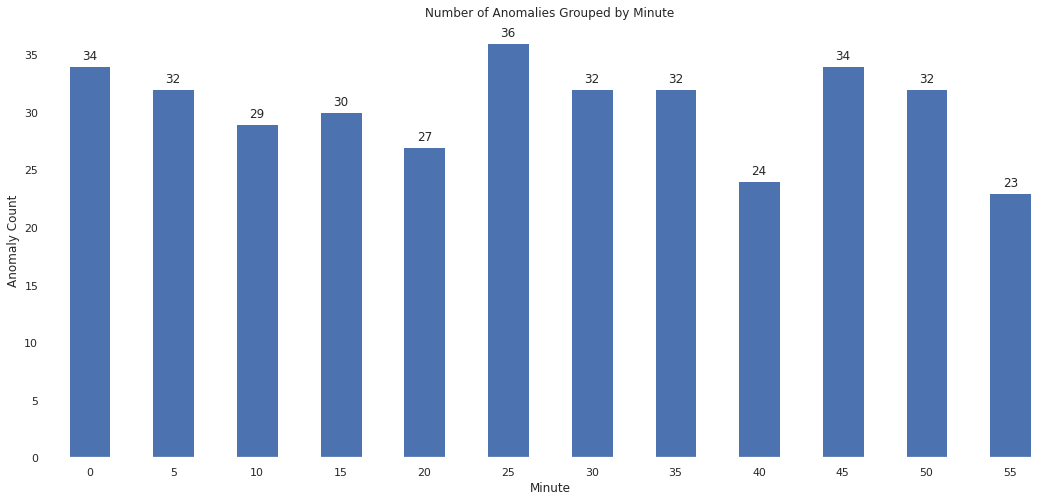

In [13]:
ax = df_1[df_1['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 2

**Descriptive Statistics**

In [14]:
df_2.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,38.697805,-0.001835,0.040659
std,18.122038,0.065090,0.197509
min,0.000000,-0.221059,0.000000
25%,35.000000,-0.073231,0.000000
50%,45.000000,0.032023,0.000000
75%,50.000000,0.052276,0.000000
max,71.000000,0.064375,1.000000


**Distribution Plot**

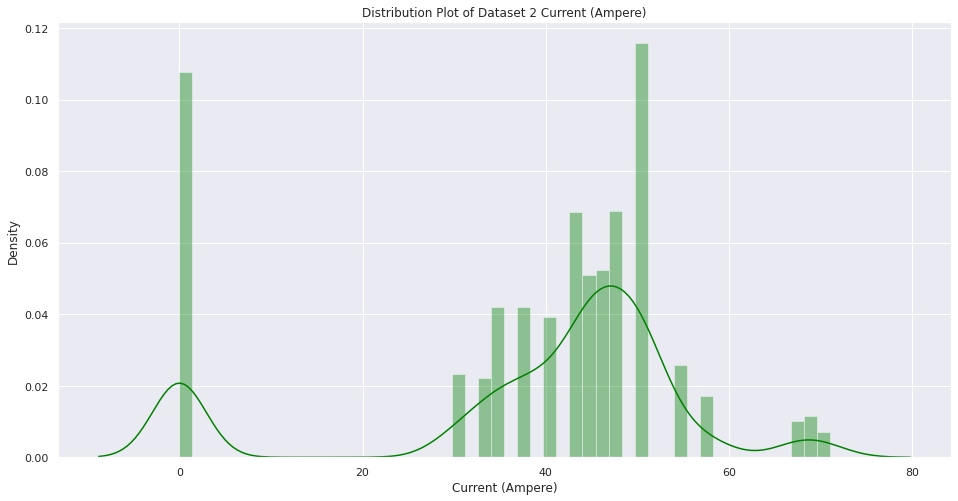

In [15]:
sns.set(rc = {"figure.figsize": (16, 8)})
sns.distplot(x = df_2["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 2 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

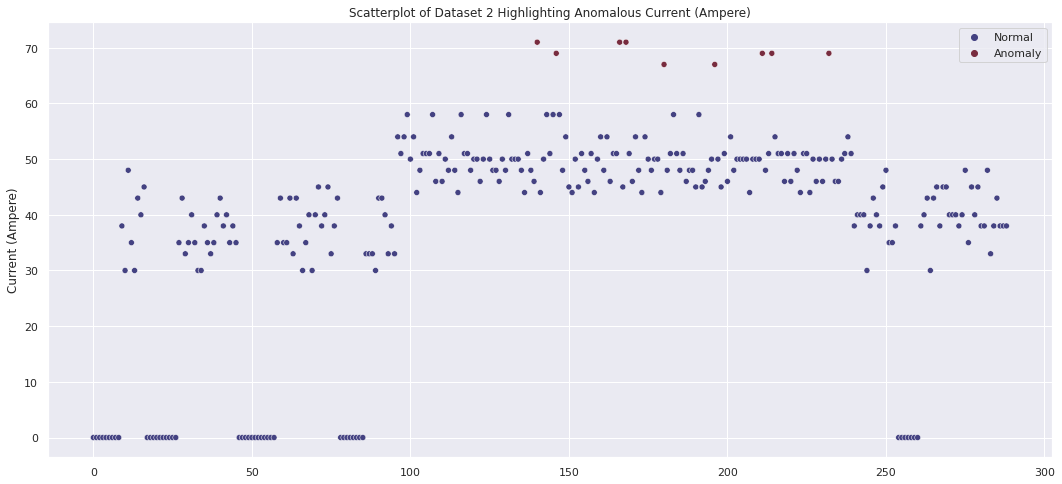

In [16]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_2.index,
                y = df_2['Current (Ampere)'].loc[0:288],
                hue = df_2['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 2 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

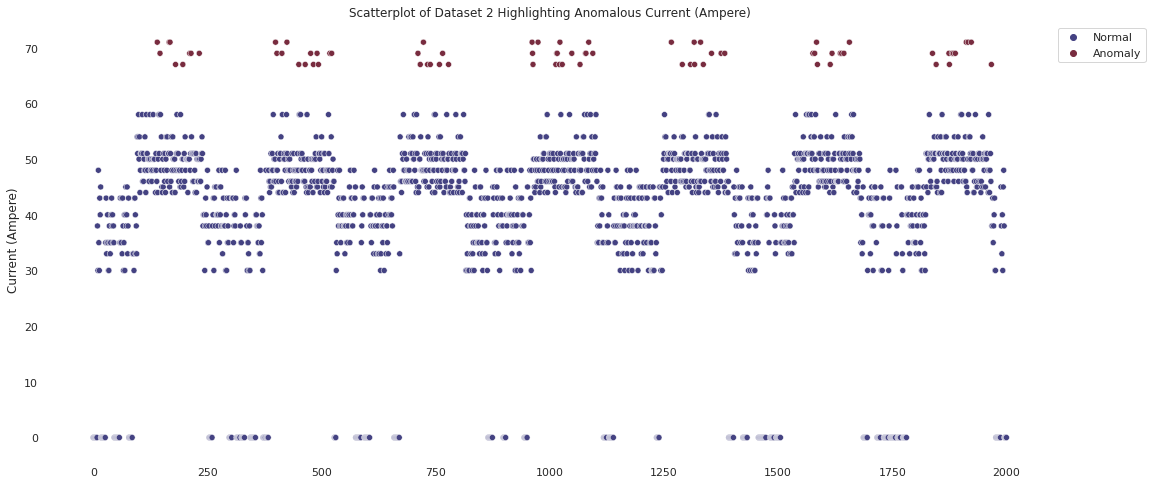

In [17]:
sns.set(rc = {'figure.figsize': (18, 8), 'axes.facecolor': 'white'})
sns.scatterplot(x = df_2.index,
                y = df_2['Current (Ampere)'].loc[0:2000],
                hue = df_2['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 2 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

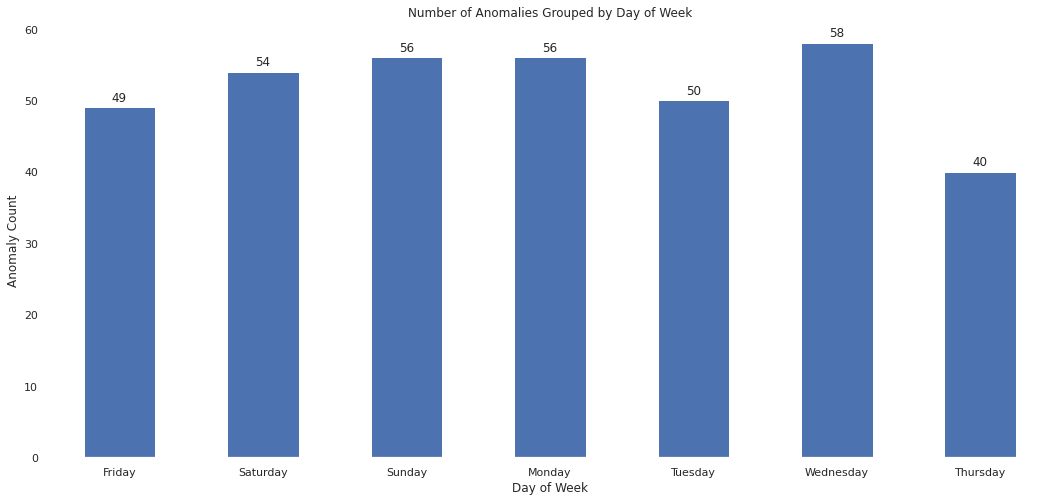

In [18]:
ax = df_2[df_2['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

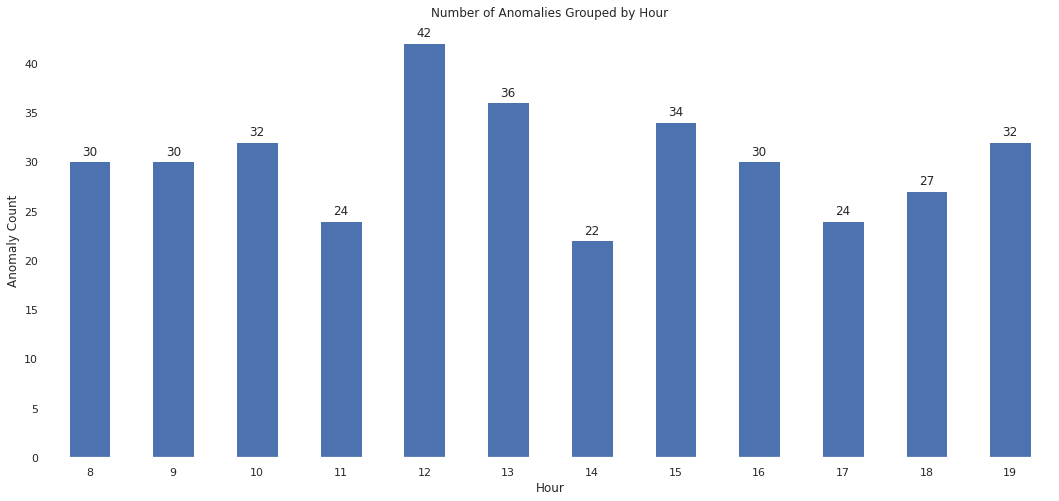

In [19]:
ax = df_2[df_2['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

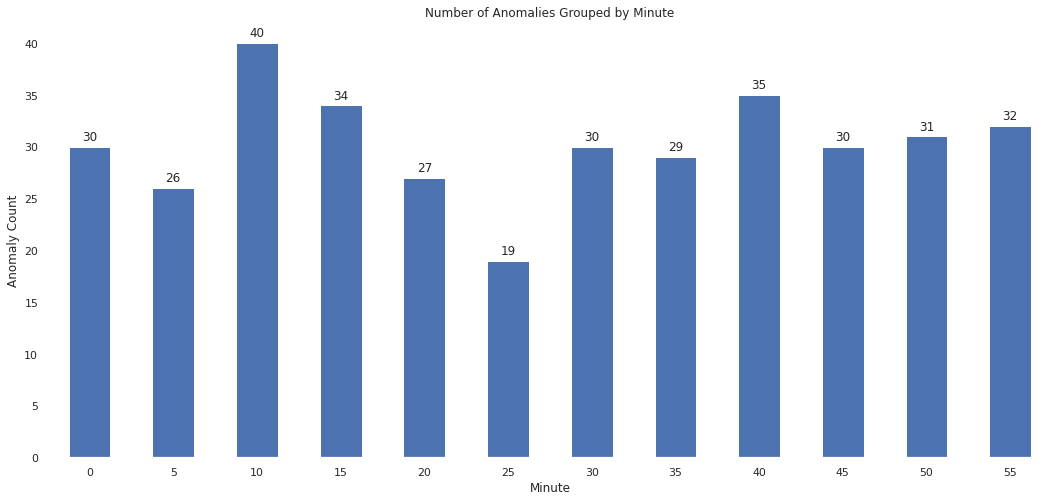

In [20]:
ax = df_2[df_2['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 3

**Descriptive Statistics**

In [21]:
df_3.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,38.473230,-0.001189,0.039315
std,17.776009,0.066988,0.194353
min,0.000000,-0.205748,0.000000
25%,35.000000,-0.066361,0.000000
50%,44.000000,0.021093,0.000000
75%,49.000000,0.057330,0.000000
max,69.000000,0.069288,1.000000


**Distribution Plot**

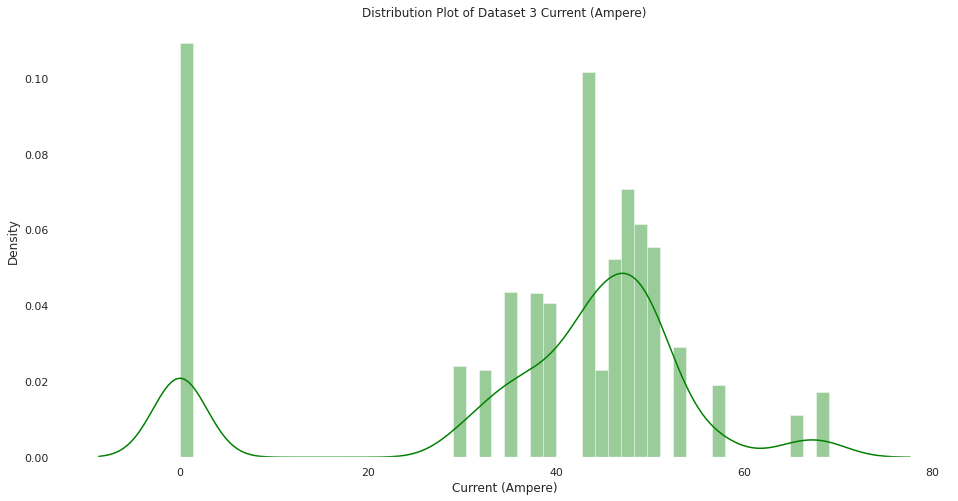

In [22]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_3["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 3 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

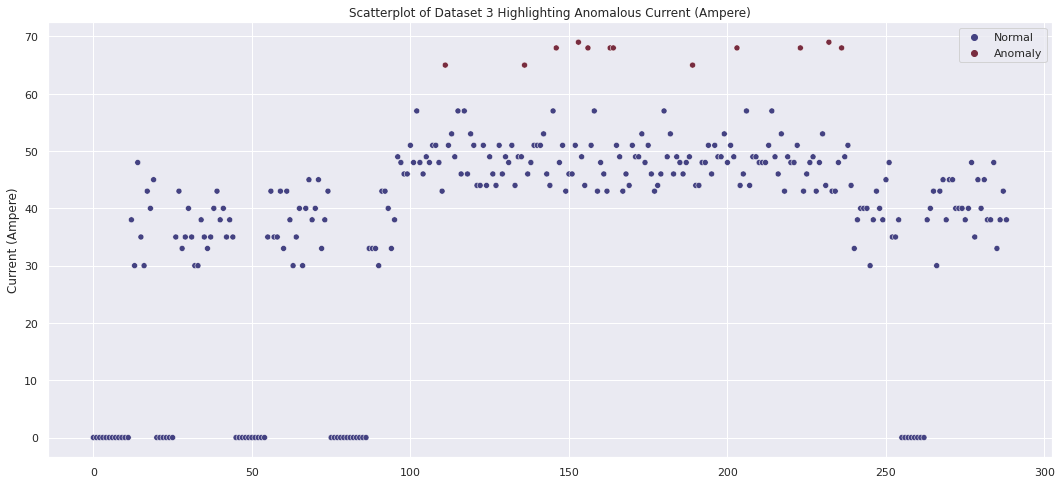

In [23]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_3.index,
                y = df_3['Current (Ampere)'].loc[0:288],
                hue = df_3['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 3 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

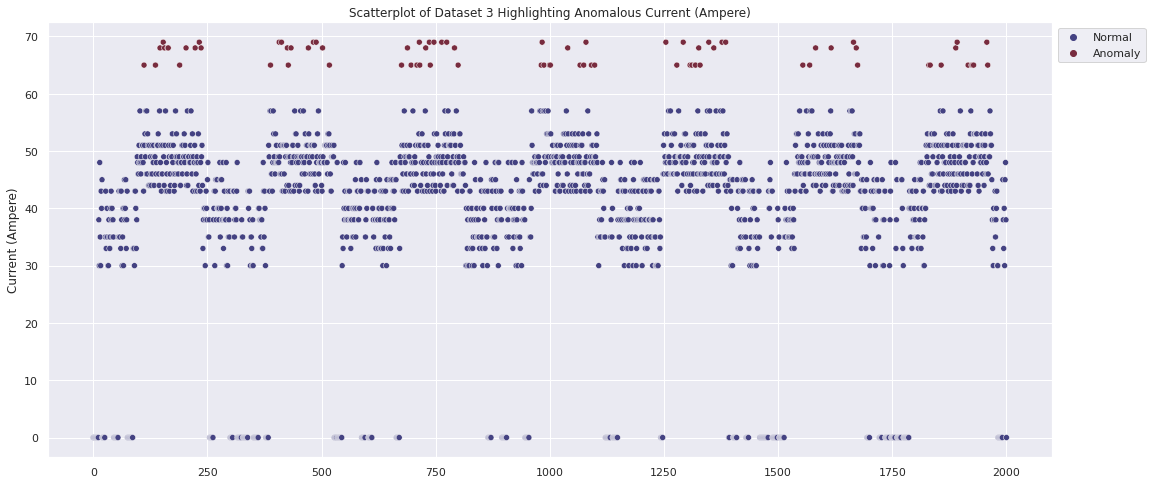

In [24]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_3.index,
                y = df_3['Current (Ampere)'].loc[0:2000],
                hue = df_3['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 3 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

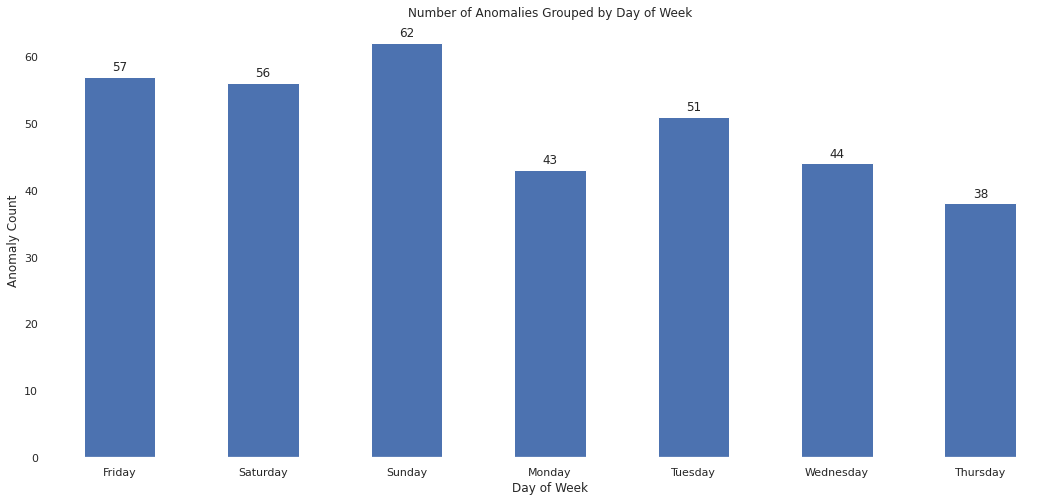

In [25]:
ax = df_3[df_3['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

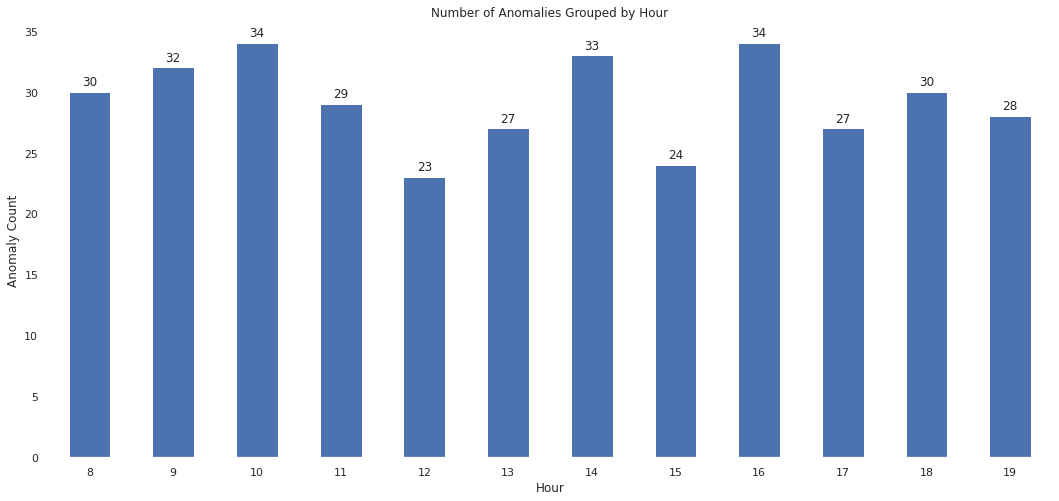

In [26]:
ax = df_3[df_3['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

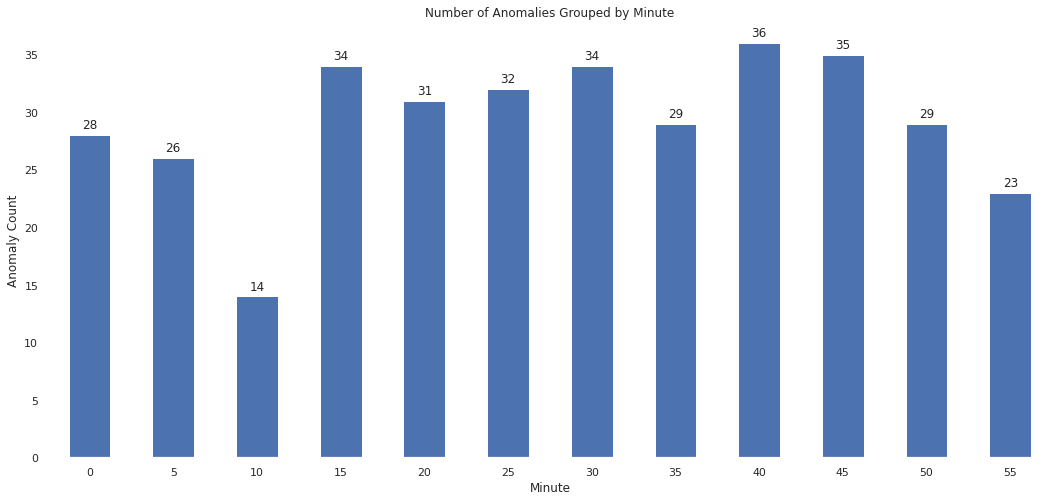

In [27]:
ax = df_3[df_3['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 4

**Descriptive Statistics**

In [28]:
df_4.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,37.779458,0.000017,0.010305
std,17.210017,0.062618,0.100993
min,0.000000,-0.263751,0.000000
25%,35.000000,-0.077053,0.000000
50%,44.000000,0.000967,0.000000
75%,49.000000,0.057162,0.000000
max,65.000000,0.072510,1.000000


**Distribution Plot**

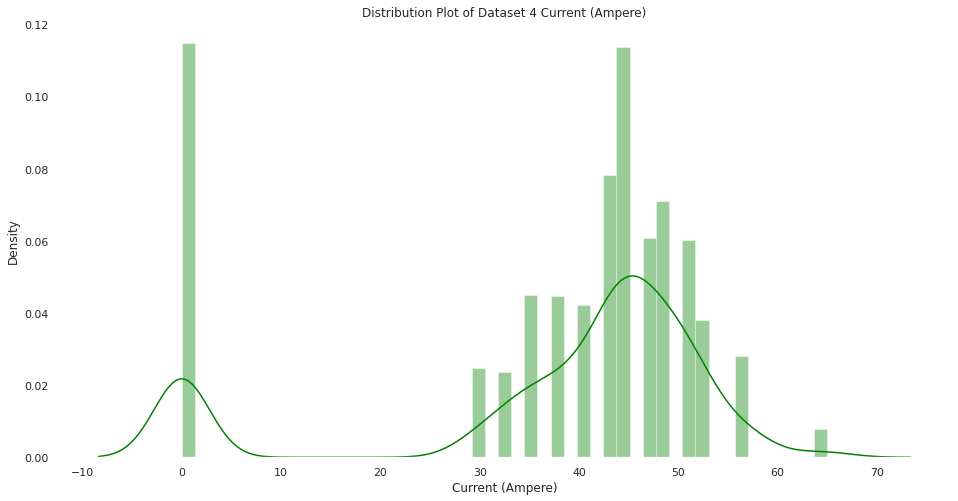

In [29]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_4["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 4 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

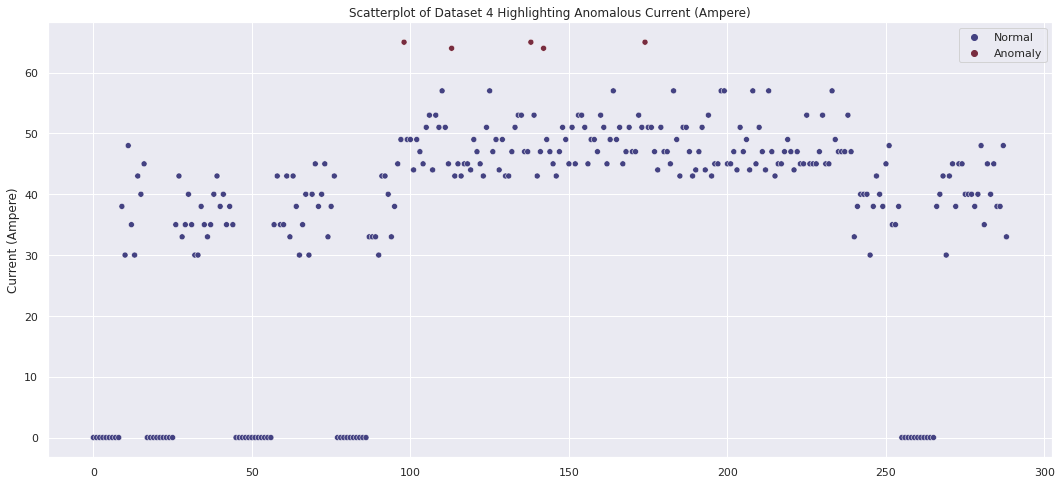

In [30]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_4.index,
                y = df_4['Current (Ampere)'].loc[0:288],
                hue = df_4['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 4 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

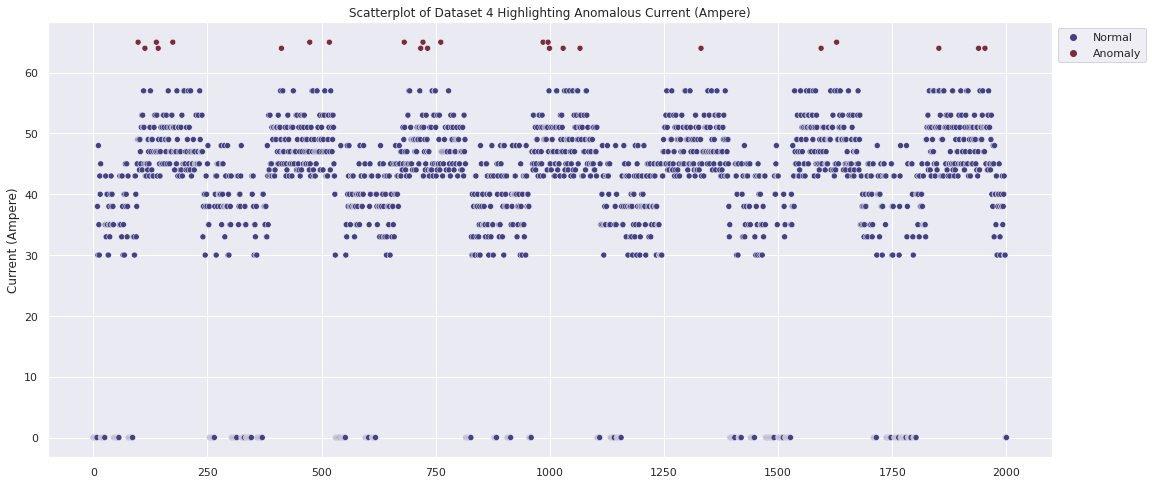

In [31]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_4.index,
                y = df_4['Current (Ampere)'].loc[0:2000],
                hue = df_4['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 4 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

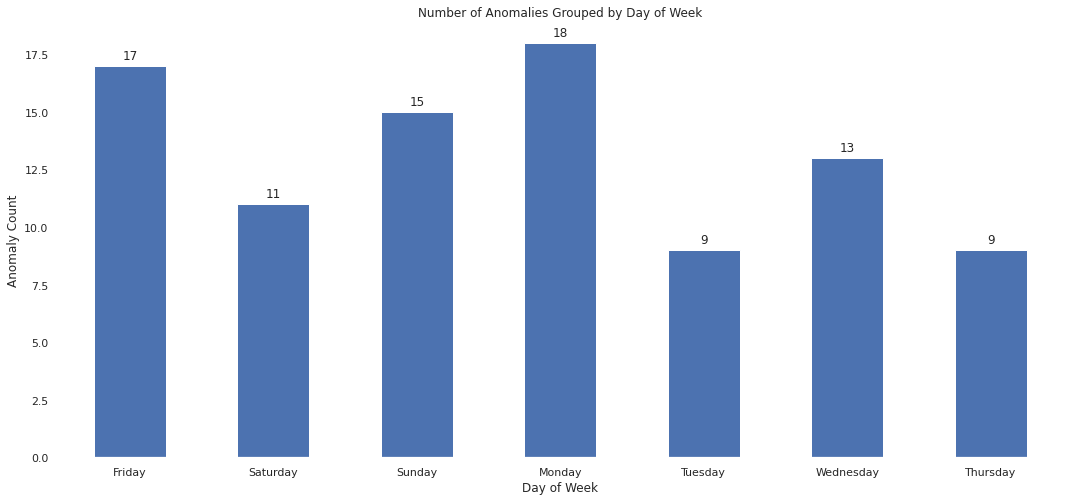

In [32]:
ax = df_4[df_4['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

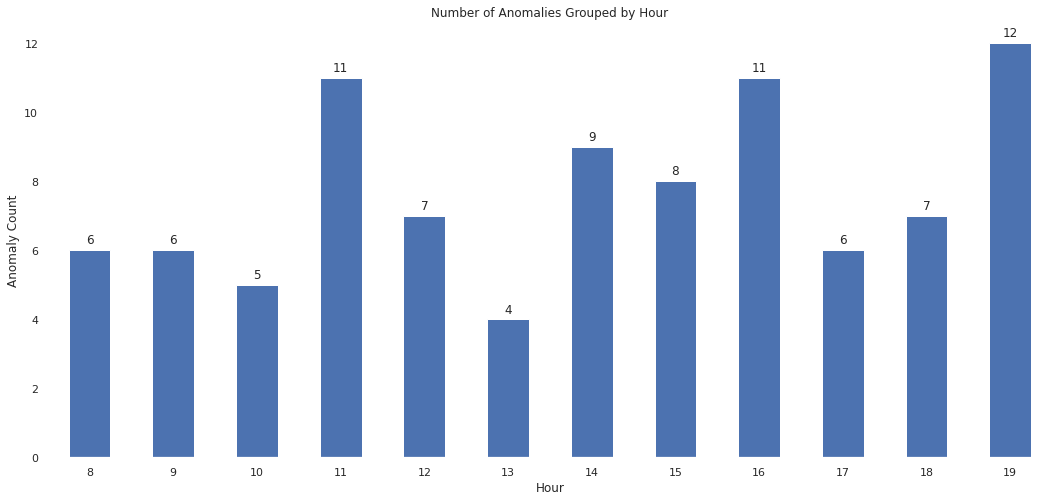

In [33]:
ax = df_4[df_4['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

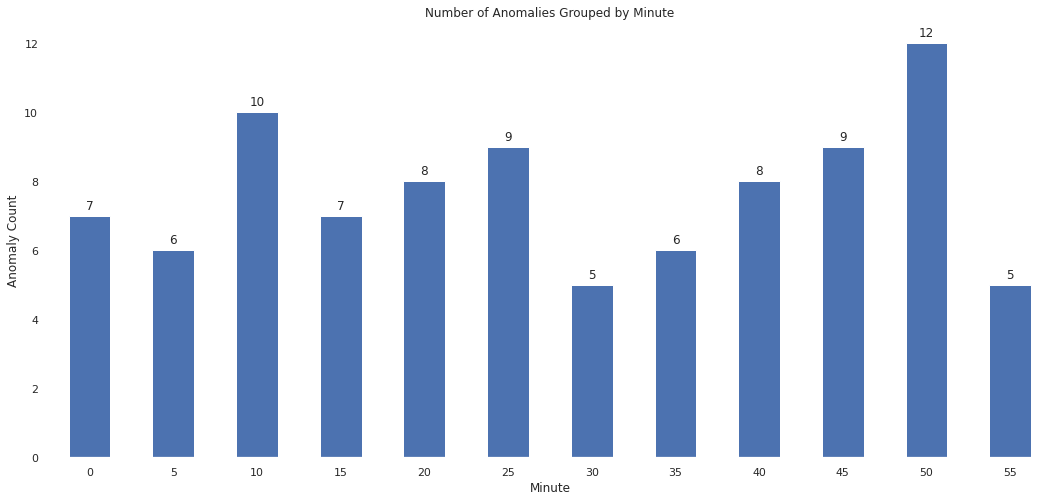

In [34]:
ax = df_4[df_4['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 5

**Descriptive Statistics**

In [35]:
df_5.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,37.769601,0.000217,0.010529
std,16.902255,0.061289,0.102073
min,0.000000,-0.259902,0.000000
25%,35.000000,-0.070543,0.000000
50%,43.000000,0.011107,0.000000
75%,48.000000,0.051545,0.000000
max,65.000000,0.061297,1.000000


**Distribution Plot**

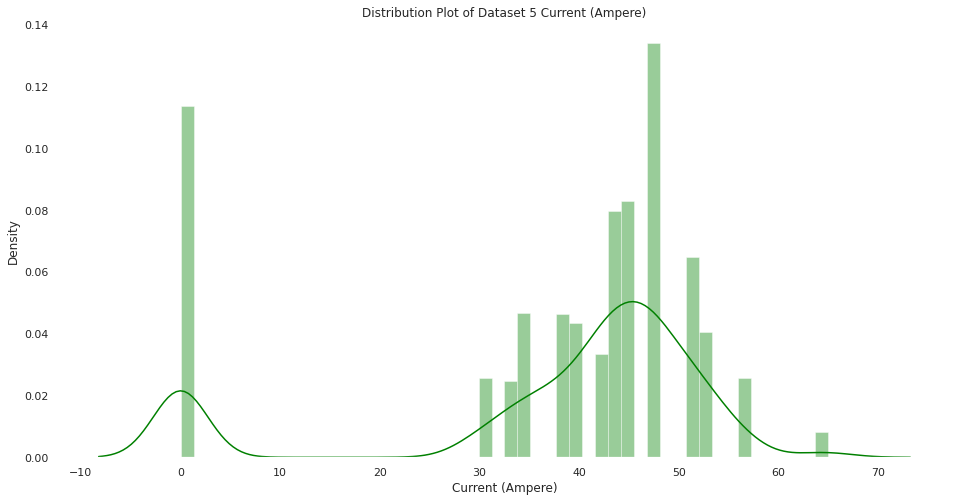

In [36]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_5["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 5 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

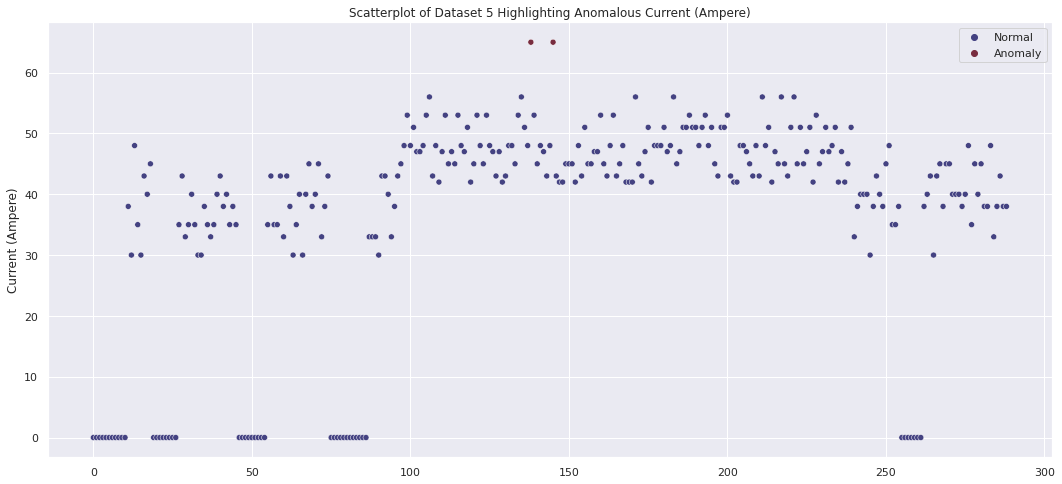

In [37]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_5.index,
                y = df_5['Current (Ampere)'].loc[0:288],
                hue = df_5['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 5 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

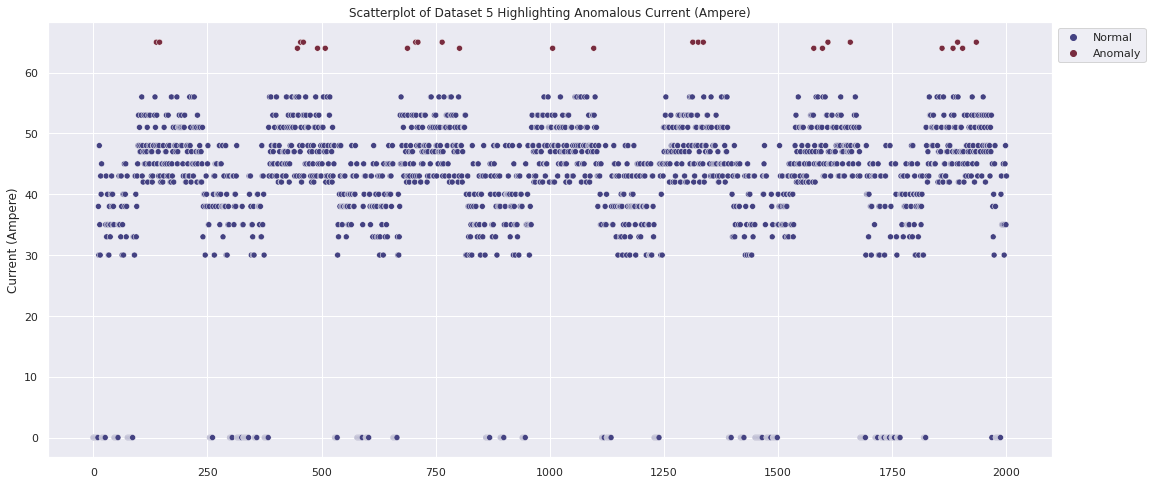

In [38]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_5.index,
                y = df_5['Current (Ampere)'].loc[0:2000],
                hue = df_5['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 5 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

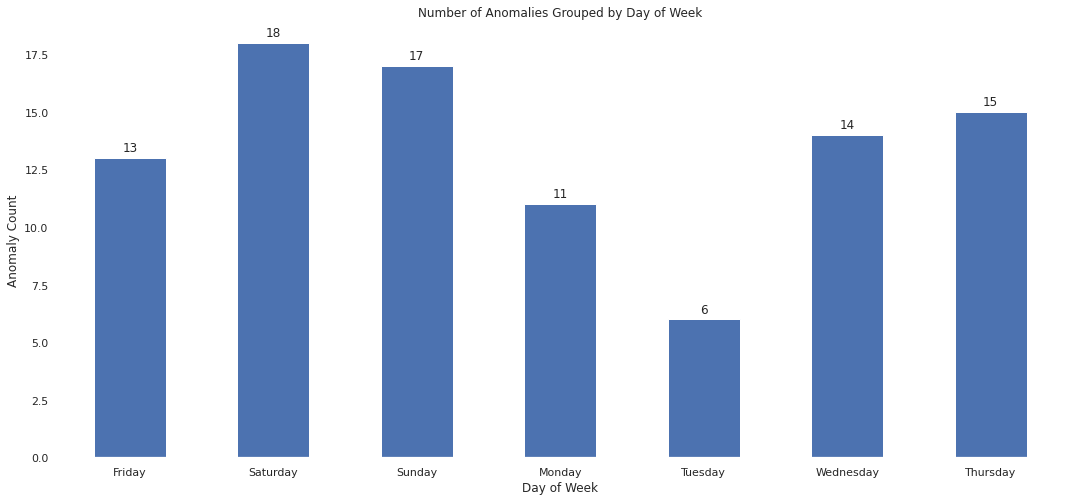

In [39]:
ax = df_5[df_5['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

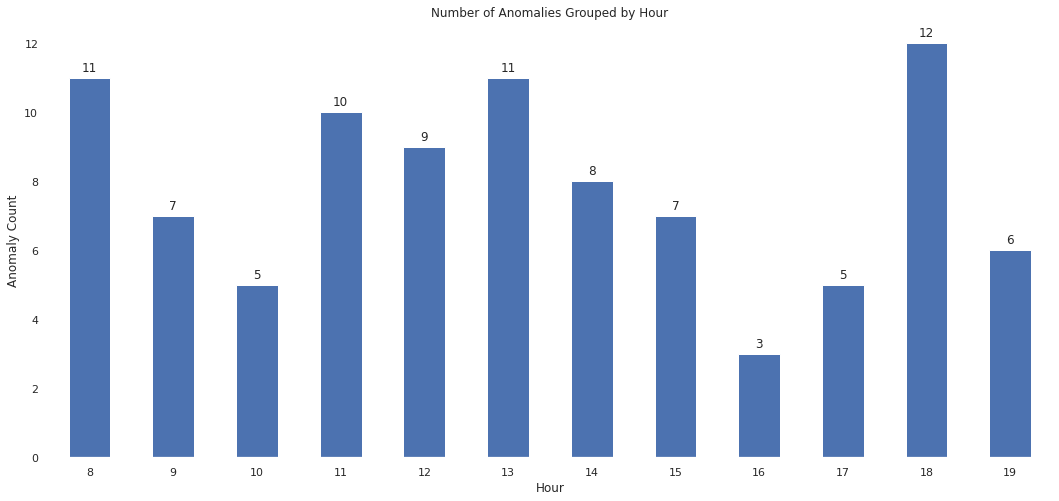

In [40]:
ax = df_5[df_5['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

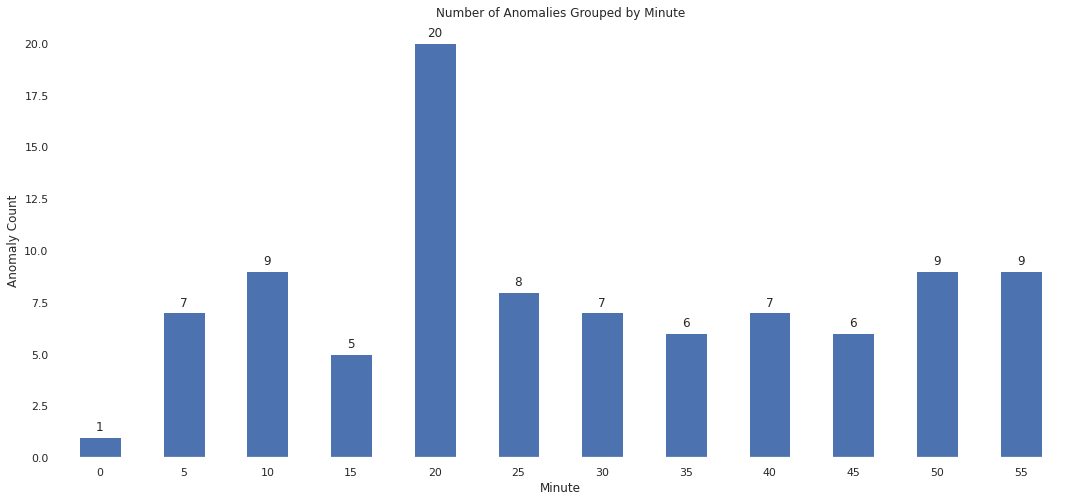

In [41]:
ax = df_5[df_5['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 6

**Descriptive Statistics**

In [42]:
df_6.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,37.377800,0.001609,0.009521
std,16.790016,0.063577,0.097113
min,0.000000,-0.251957,0.000000
25%,35.000000,-0.072437,0.000000
50%,43.000000,0.016146,0.000000
75%,48.000000,0.049096,0.000000
max,65.000000,0.079809,1.000000


**Distribution Plot**

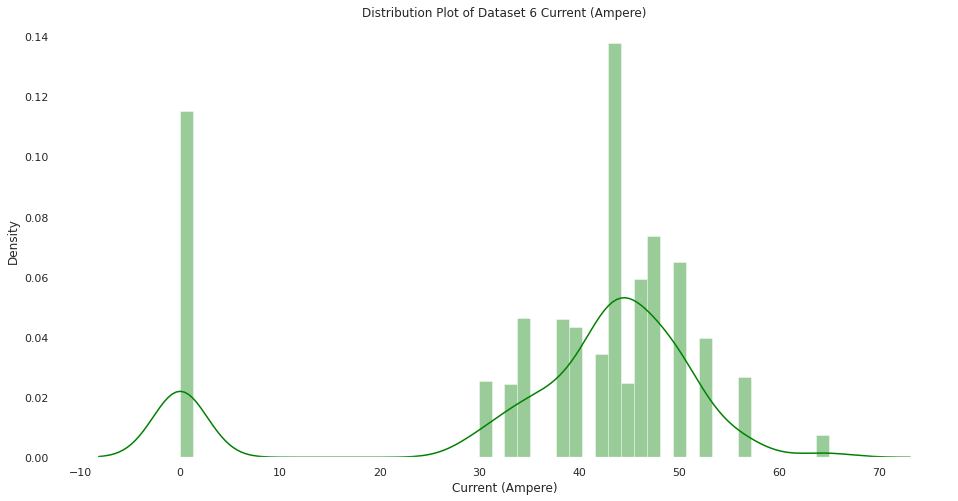

In [43]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_6["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 6 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

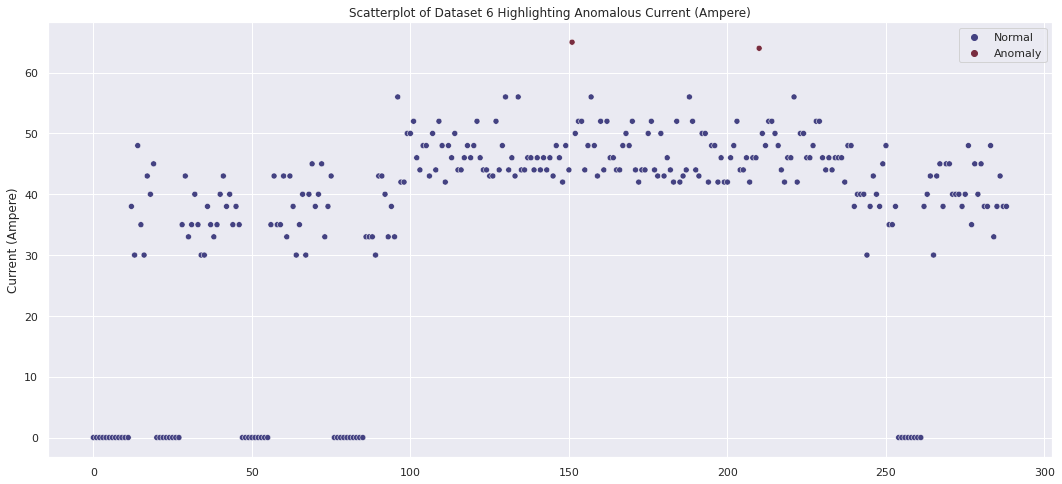

In [44]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_6.index,
                y = df_6['Current (Ampere)'].loc[0:288],
                hue = df_6['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 6 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

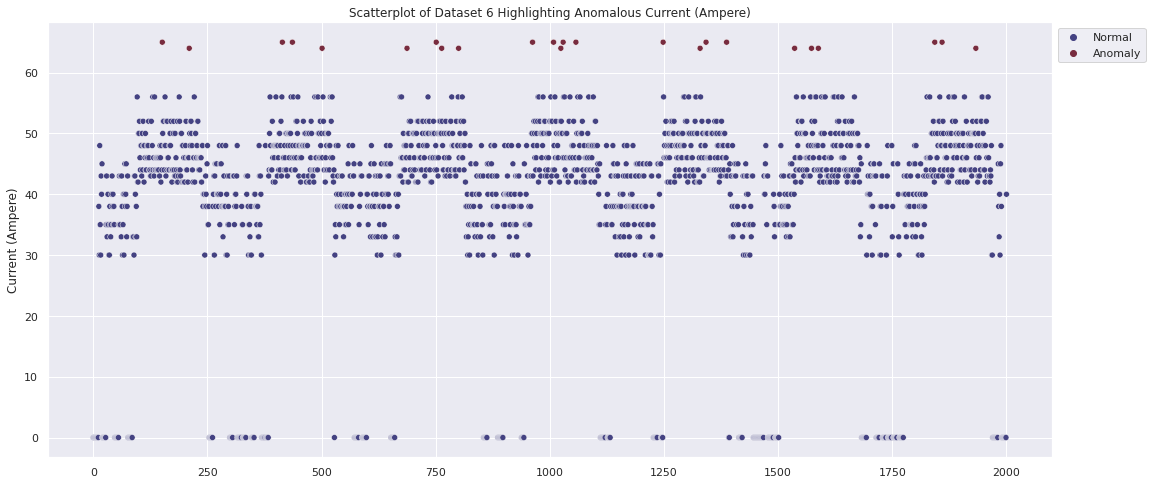

In [45]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_6.index,
                y = df_6['Current (Ampere)'].loc[0:2000],
                hue = df_6['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 6 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

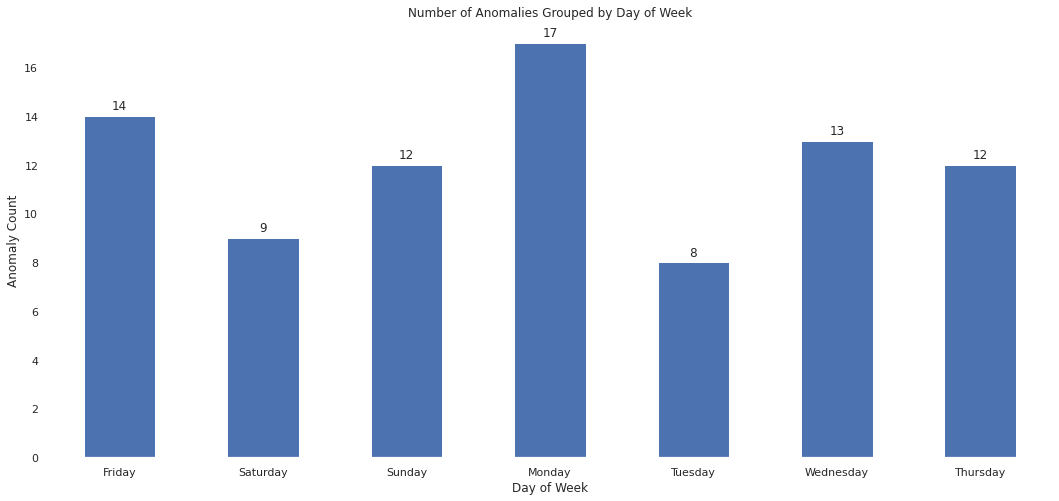

In [46]:
ax = df_6[df_6['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

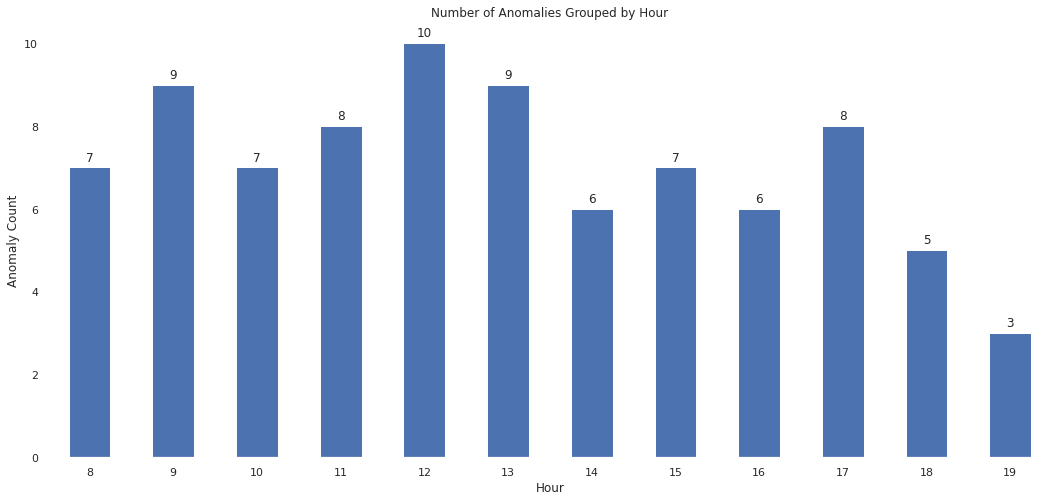

In [47]:
ax = df_6[df_6['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

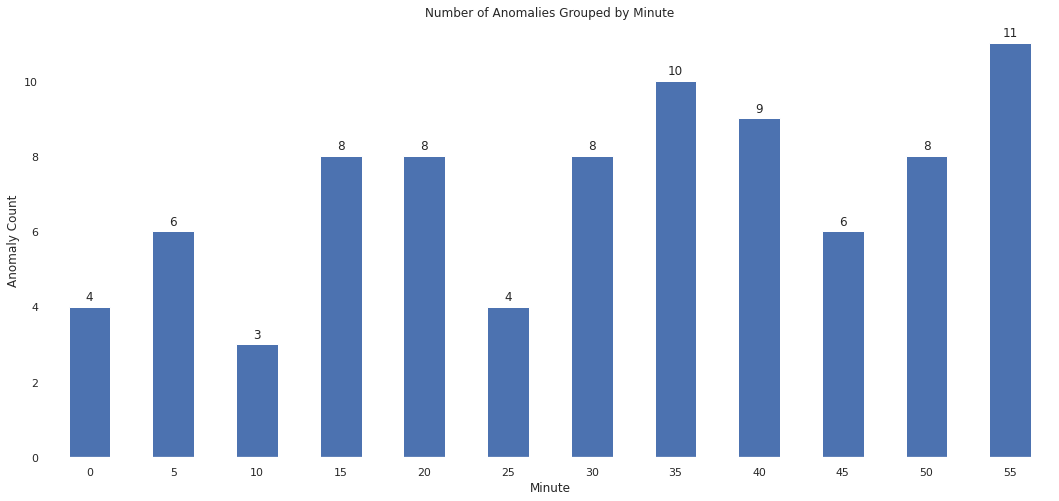

In [48]:
ax = df_6[df_6['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 7

**Descriptive Statistics**

In [49]:
df_7.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,37.112231,0.001414,0.008289
std,16.735435,0.062690,0.090668
min,0.000000,-0.250410,0.000000
25%,35.000000,-0.077357,0.000000
50%,43.000000,0.028807,0.000000
75%,47.000000,0.052302,0.000000
max,65.000000,0.068992,1.000000


**Distribution Plot**

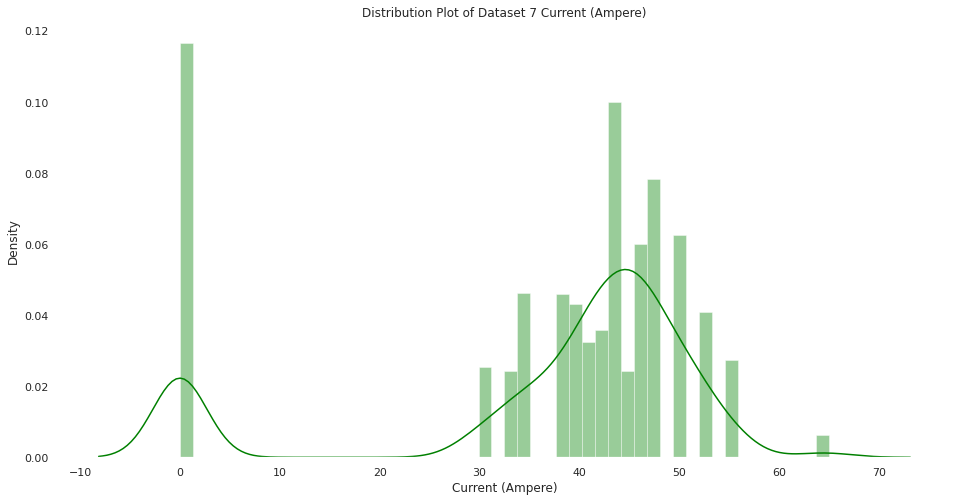

In [50]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_7["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 7 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

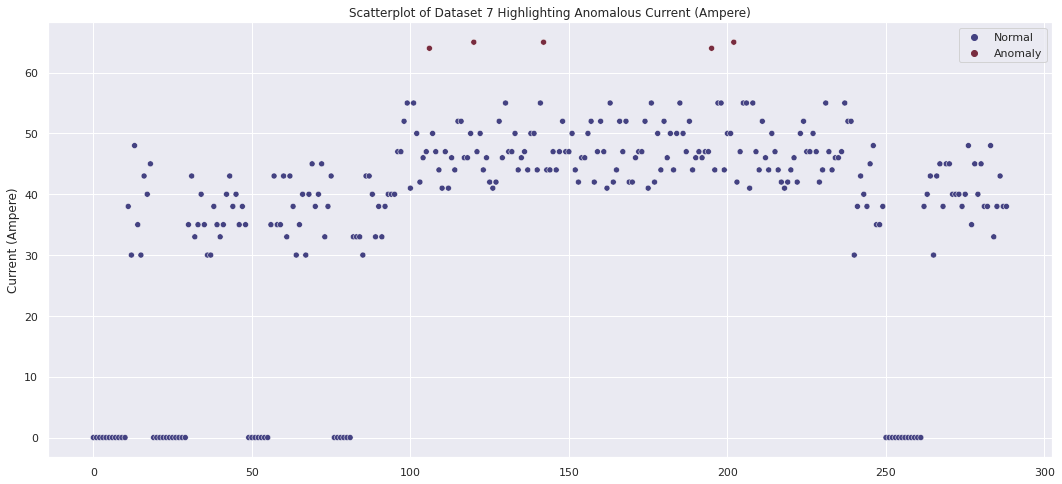

In [51]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_7.index,
                y = df_7['Current (Ampere)'].loc[0:288],
                hue = df_7['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 7 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

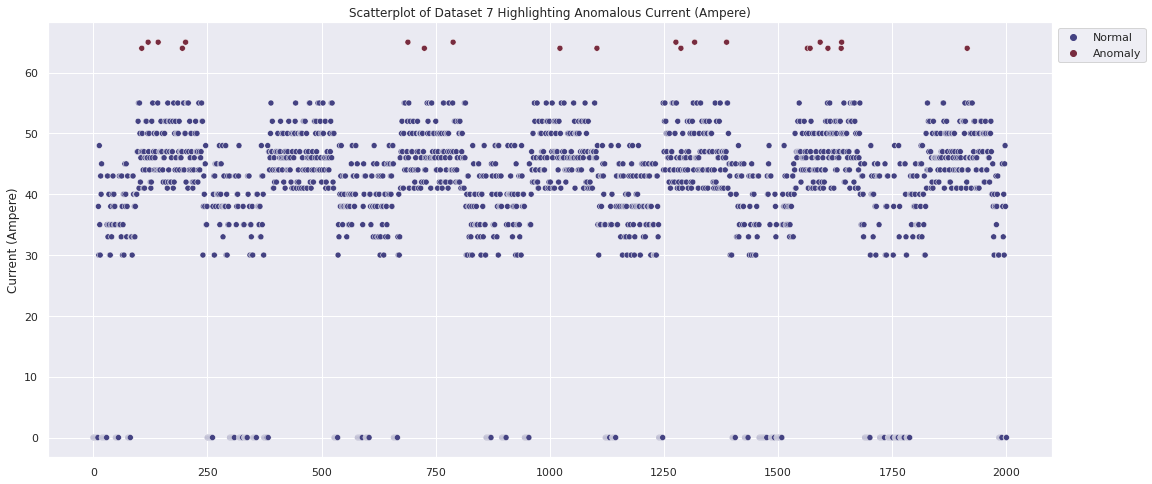

In [52]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_7.index,
                y = df_7['Current (Ampere)'].loc[0:2000],
                hue = df_7['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 7 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

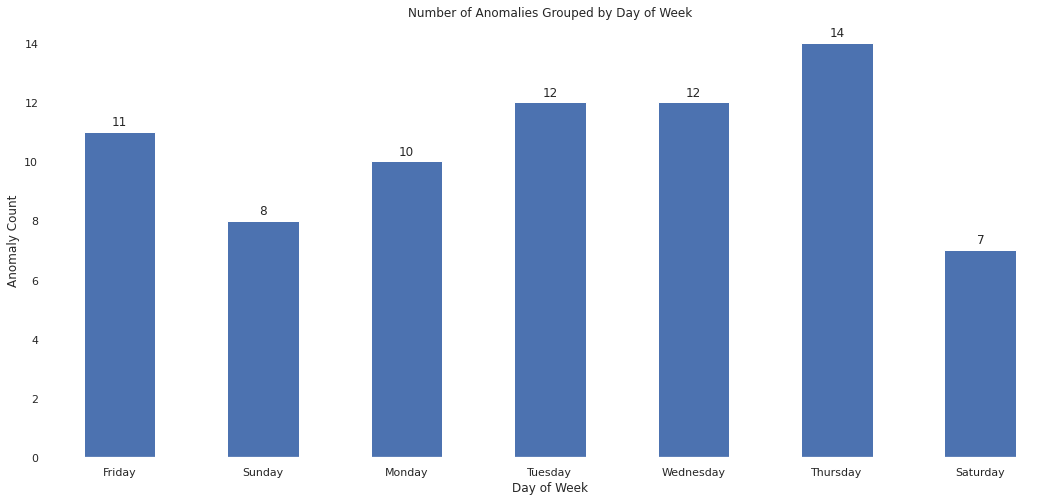

In [53]:
ax = df_7[df_7['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

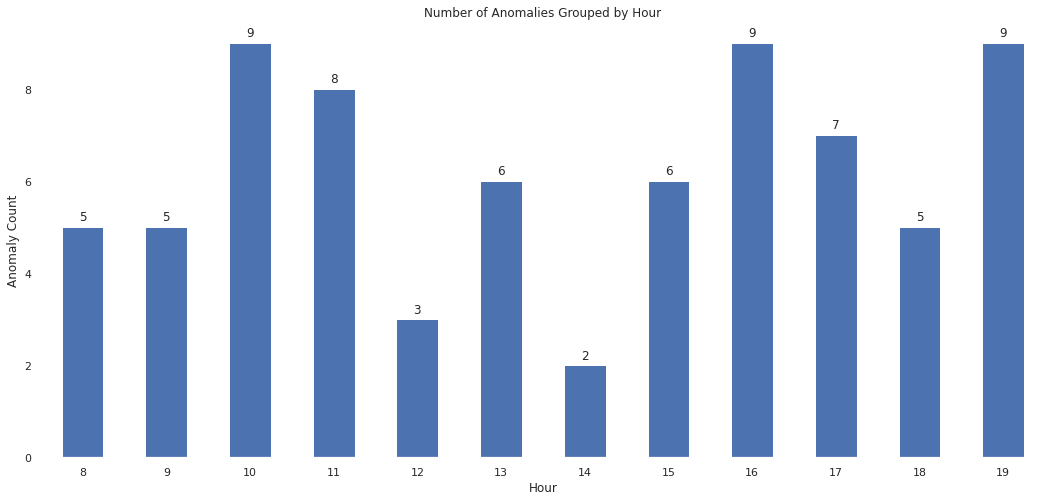

In [54]:
ax = df_7[df_7['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

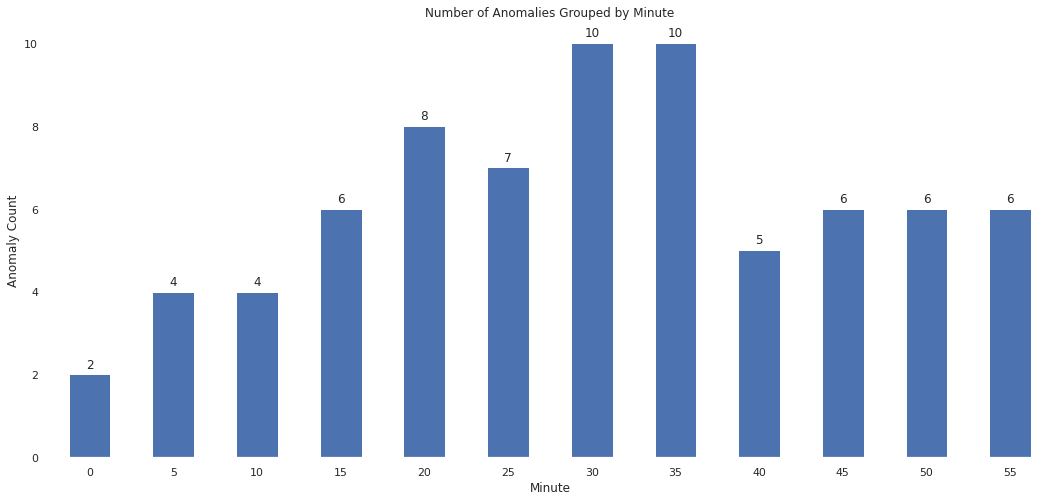

In [55]:
ax = df_7[df_7['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 8

**Descriptive Statistics**

In [56]:
df_8.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,36.945004,0.003342,0.011425
std,16.737043,0.064561,0.106280
min,0.000000,-0.265531,0.000000
25%,35.000000,-0.072191,0.000000
50%,43.000000,0.029704,0.000000
75%,47.000000,0.047561,0.000000
max,66.000000,0.080227,1.000000


**Distribution Plot**

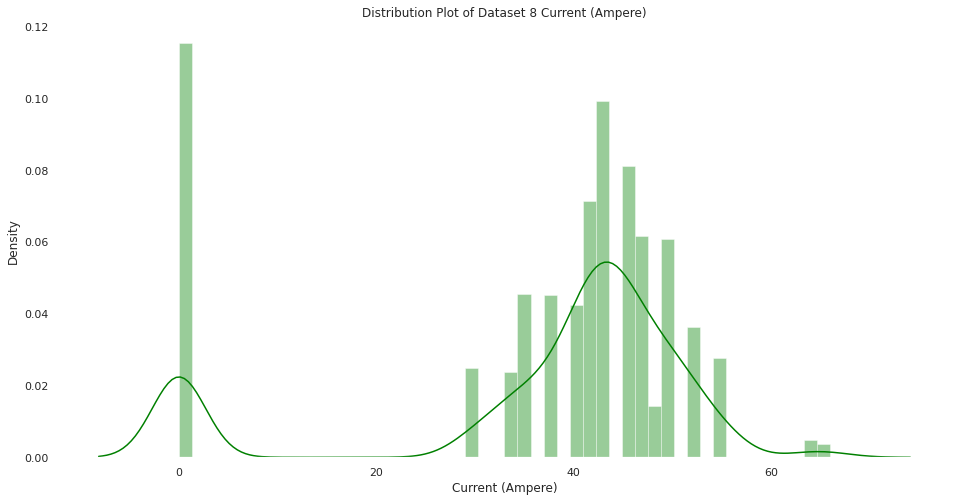

In [57]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_8["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 8 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

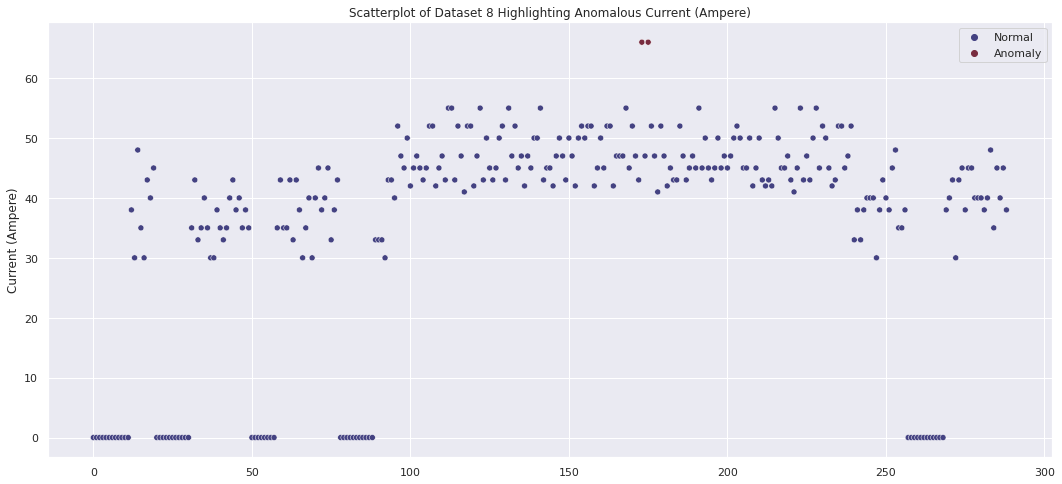

In [58]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_8.index,
                y = df_8['Current (Ampere)'].loc[0:288],
                hue = df_8['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 8 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

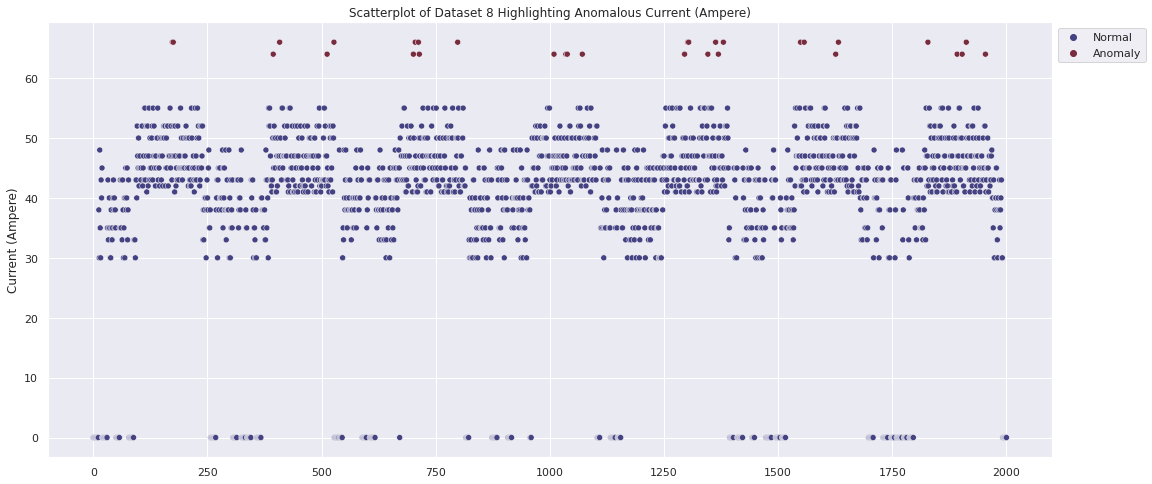

In [59]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_8.index,
                y = df_8['Current (Ampere)'].loc[0:2000],
                hue = df_8['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 8 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

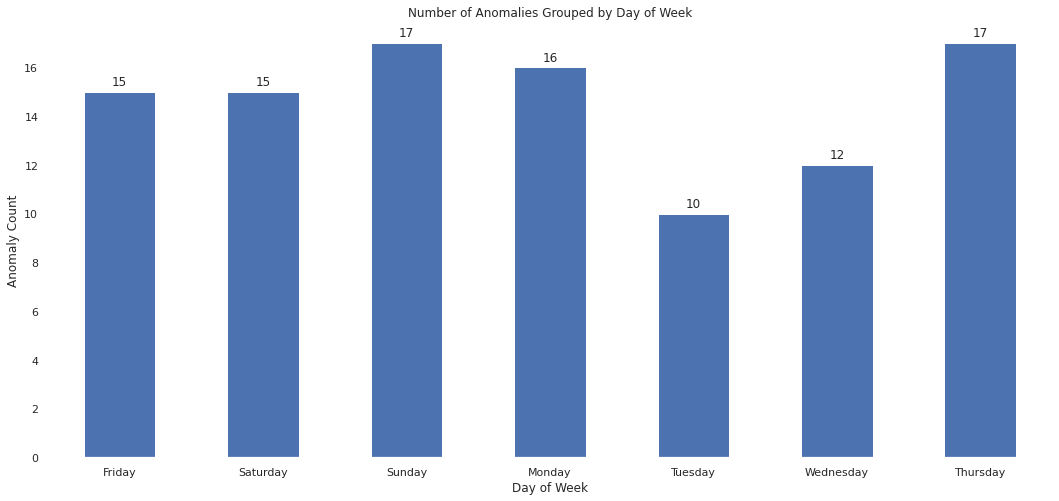

In [60]:
ax = df_8[df_8['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

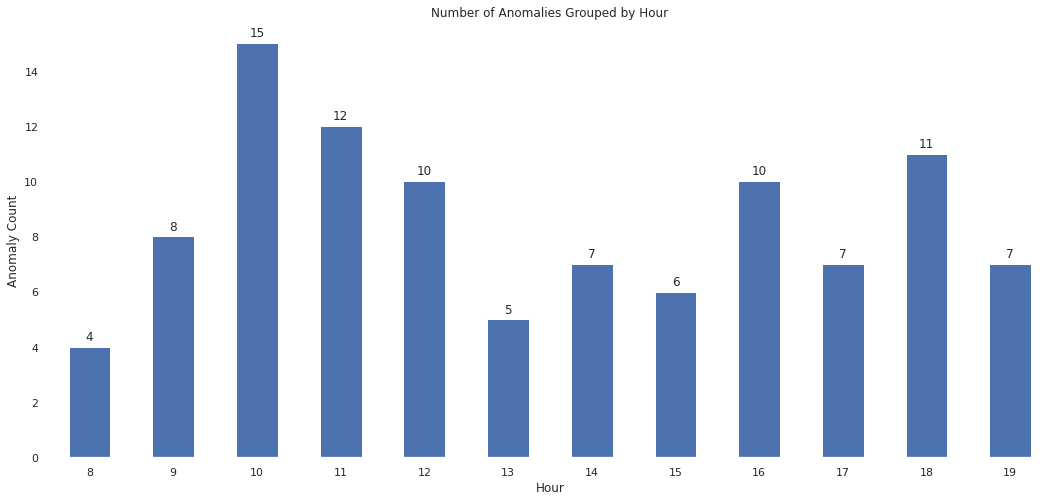

In [61]:
ax = df_8[df_8['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

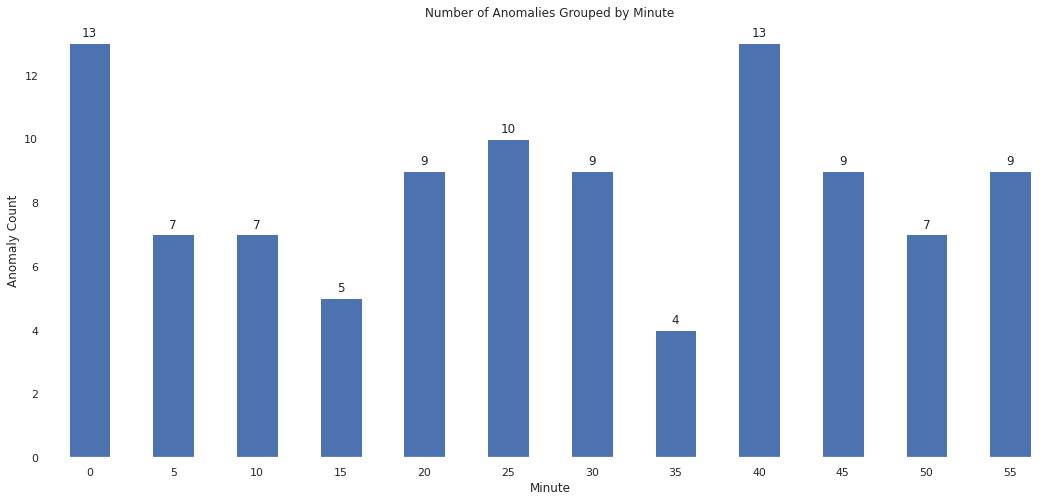

In [62]:
ax = df_8[df_8['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

**Patterns of Failure Analysis**

## Dataset 9

**Descriptive Statistics**

In [63]:
df_9.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,36.535954,0.001413,0.011201
std,16.651141,0.065640,0.105245
min,0.000000,-0.257043,0.000000
25%,35.000000,-0.077499,0.000000
50%,43.000000,0.032260,0.000000
75%,46.000000,0.055165,0.000000
max,63.000000,0.067088,1.000000


**Distribution Plot**

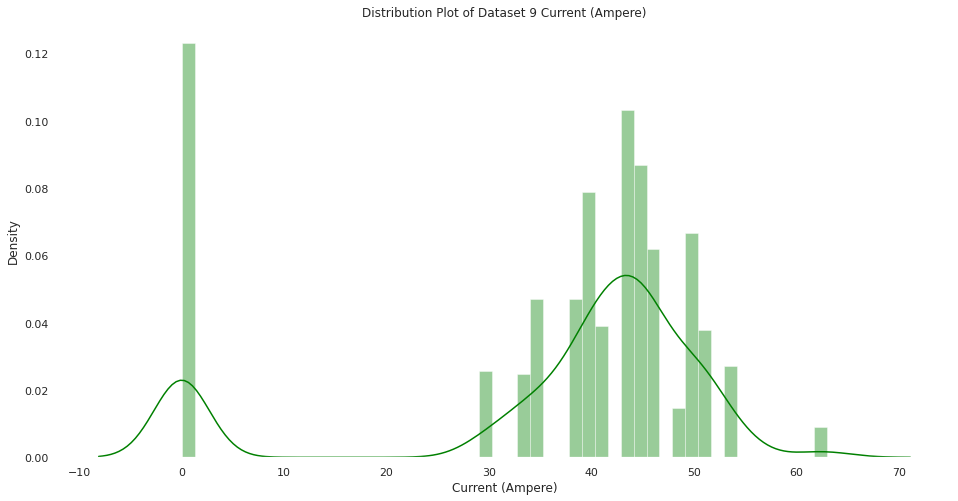

In [64]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_9["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 9 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

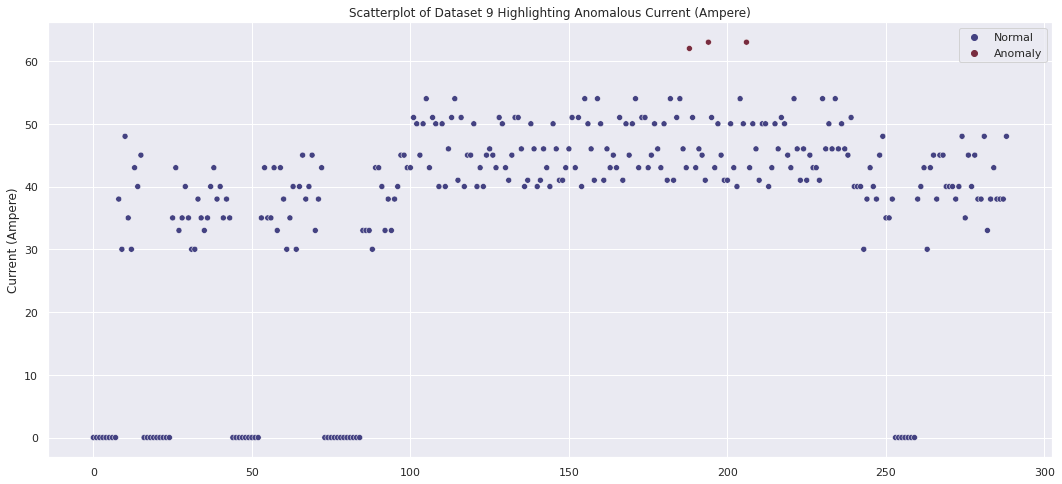

In [65]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_9.index,
                y = df_9['Current (Ampere)'].loc[0:288],
                hue = df_9['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 9 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

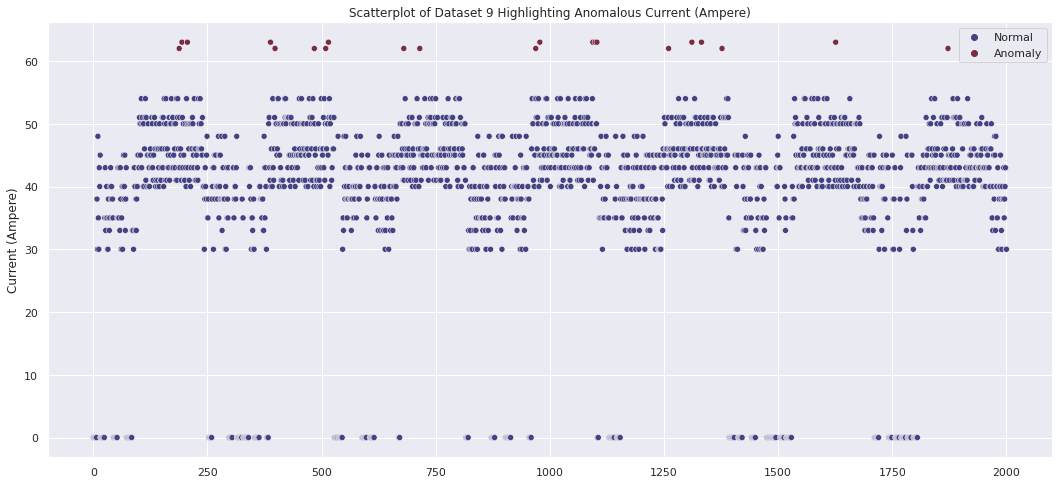

In [66]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_9.index,
                y = df_9['Current (Ampere)'].loc[0:2000],
                hue = df_9['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 9 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

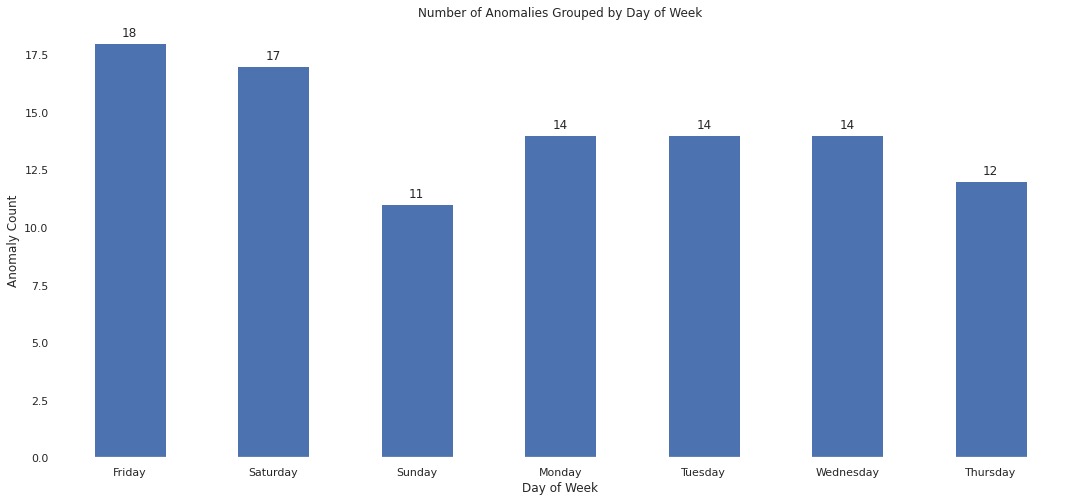

In [67]:
ax = df_9[df_9['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

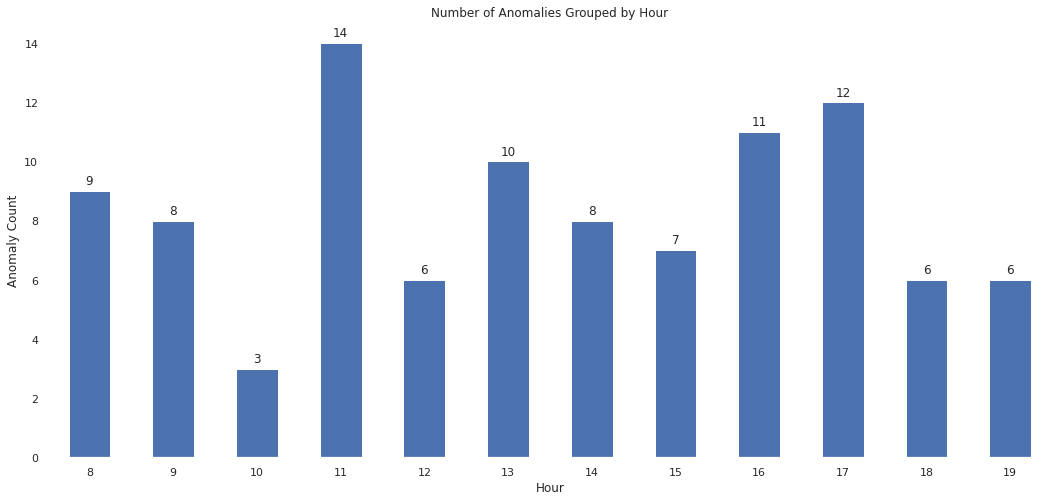

In [68]:
ax = df_9[df_9['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

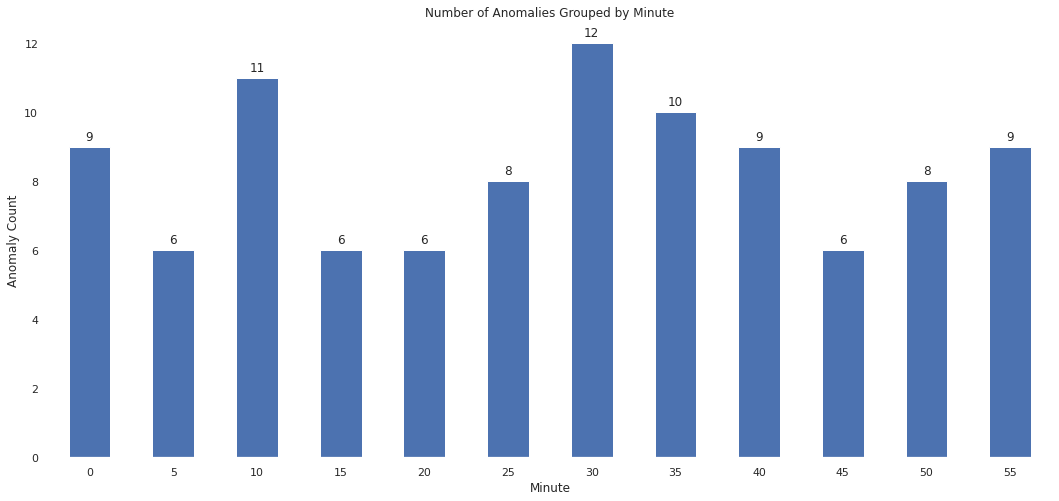

In [69]:
ax = df_9[df_9['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

## Dataset 10

**Descriptive Statistics**

In [70]:
df_10.describe().iloc[:, 0:3]

,Current (Ampere),scores,anomaly
count,8928.000000,8928.000000,8928.000000
mean,36.501568,0.001757,0.009745
std,16.245367,0.063121,0.098238
min,0.000000,-0.259970,0.000000
25%,35.000000,-0.070661,0.000000
50%,42.000000,0.020972,0.000000
75%,46.000000,0.059387,0.000000
max,61.000000,0.069801,1.000000


**Distribution Plot**

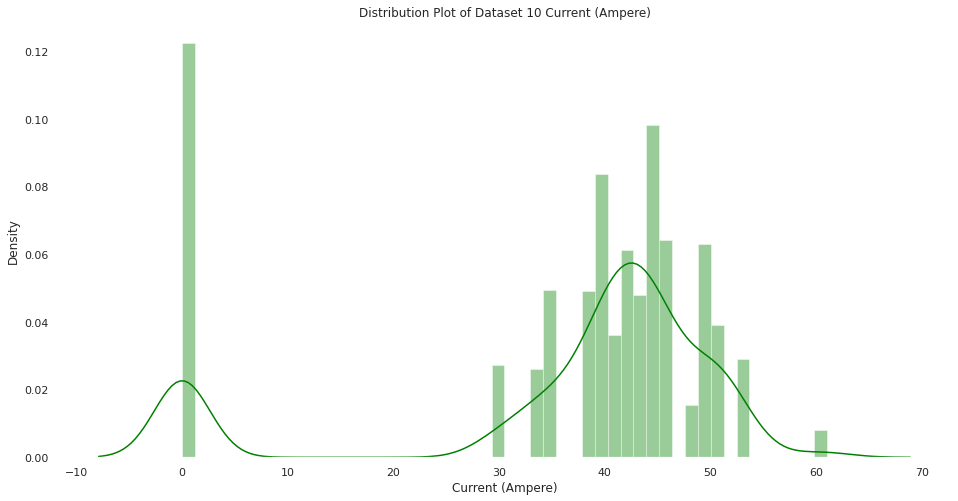

In [71]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor': 'white'})
sns.distplot(x = df_10["Current (Ampere)"], color = 'Green').set_title("Distribution Plot of Dataset 10 Current (Ampere)")
plt.xlabel('Current (Ampere)')
plt.show()

**Scatterplot Visualization**

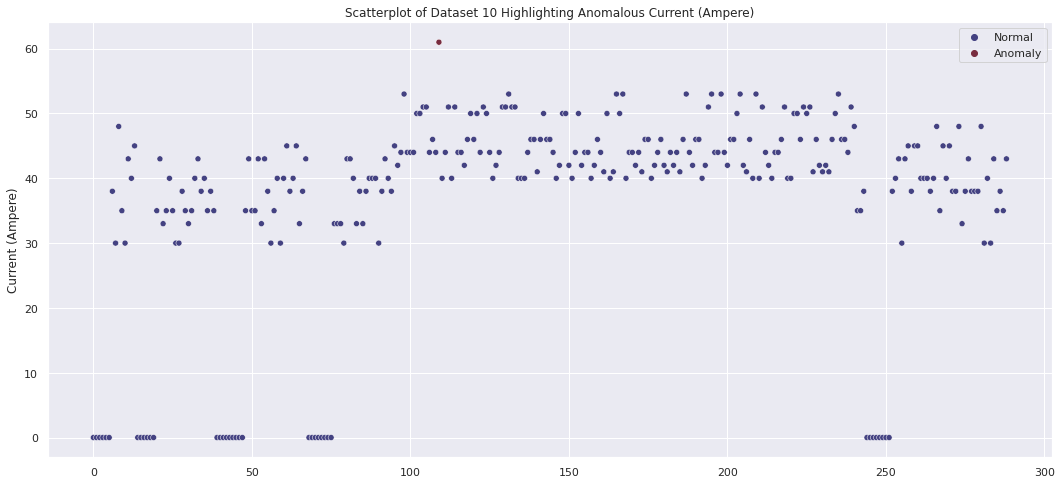

In [72]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_10.index,
                y = df_10['Current (Ampere)'].loc[0:288],
                hue = df_10['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 10 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

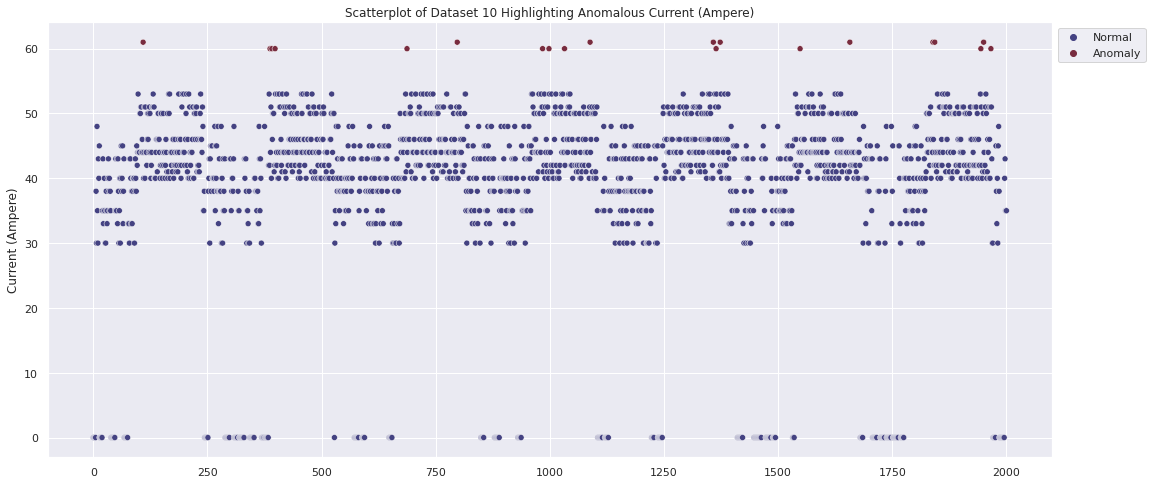

In [73]:
sns.set(rc = {'figure.figsize': (18, 8)})
sns.scatterplot(x = df_10.index,
                y = df_10['Current (Ampere)'].loc[0:2000],
                hue = df_10['anomaly'],
                palette = "icefire")
plt.title("Scatterplot of Dataset 10 Highlighting Anomalous Current (Ampere)")
L = plt.legend(bbox_to_anchor = (1, 1))
L.get_texts()[1].set_text('Anomaly')
L.get_texts()[0].set_text('Normal')
plt.show()

**Patterns of Failure Analysis**

Number of Anomalies Grouped by Day of Week

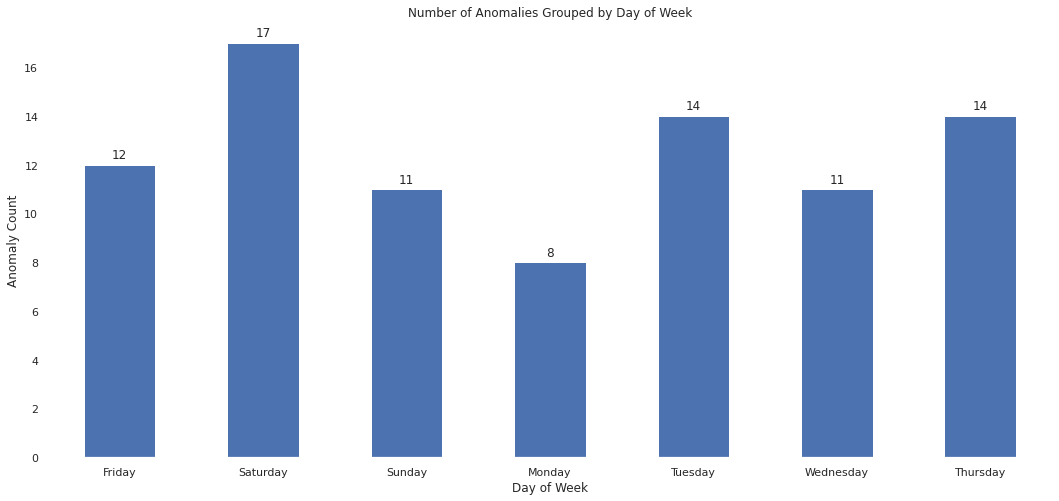

In [74]:
ax = df_10[df_10['anomaly'] == 1].groupby('day_of_week', sort=False)['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Day of Week')
plt.ylabel('Anomaly Count')
plt.xlabel('Day of Week')
plt.show()

Number of Anomalies Grouped by Hour

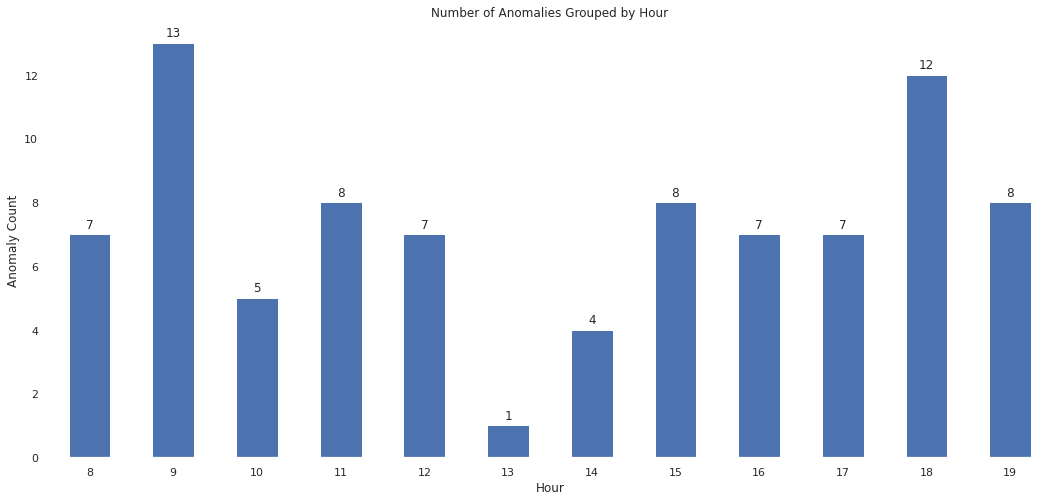

In [75]:
ax = df_10[df_10['anomaly'] == 1].groupby('hour')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Hour')
plt.ylabel('Anomaly Count')
plt.xlabel('Hour')
plt.show()

Number of Anomalies Grouped by Minute

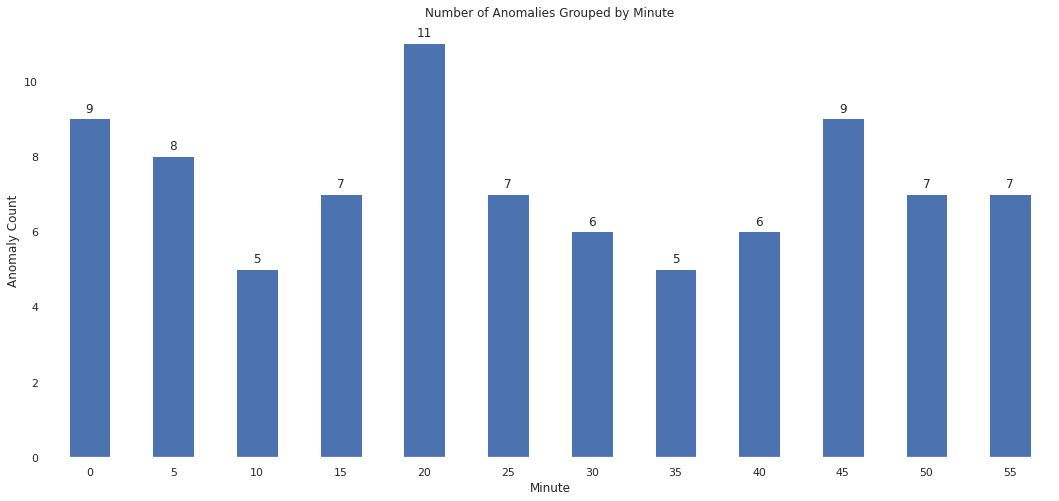

In [76]:
ax = df_10[df_10['anomaly'] == 1].groupby('minute')['anomaly'].count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.title('Number of Anomalies Grouped by Minute')
plt.ylabel('Anomaly Count')
plt.xlabel('Minute')
plt.show()

**Anomaly Count of all Assets for Current (Ampere)**

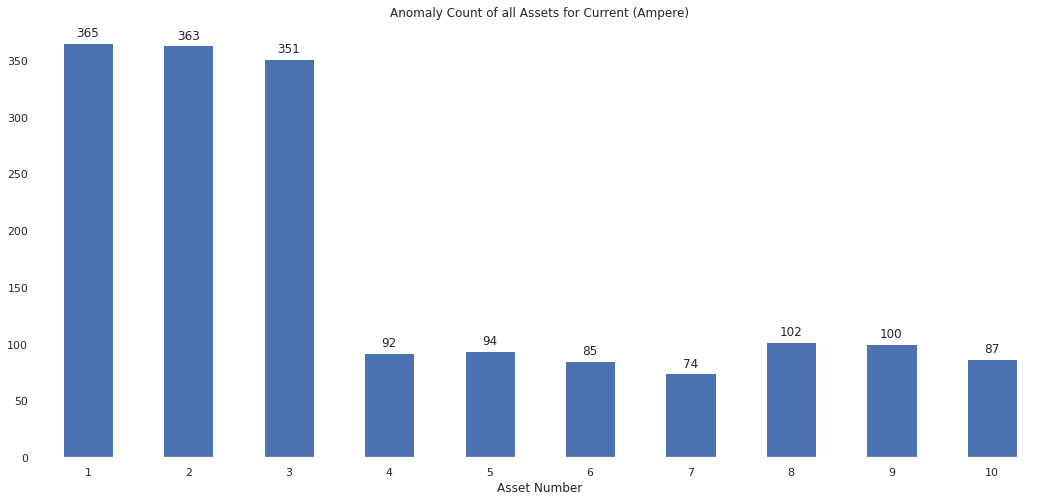

In [77]:
list_asset = [i + 1 for i in range(10)]
data1 = df_1[df_1['anomaly'] == 1]["anomaly"].count()
data2 = df_2[df_2['anomaly'] == 1]["anomaly"].count()
data3 = df_3[df_3['anomaly'] == 1]["anomaly"].count()
data4 = df_4[df_4['anomaly'] == 1]["anomaly"].count()
data5 = df_5[df_5['anomaly'] == 1]["anomaly"].count()
data6 = df_6[df_6['anomaly'] == 1]["anomaly"].count()
data7 = df_7[df_7['anomaly'] == 1]["anomaly"].count()
data8 = df_8[df_8['anomaly'] == 1]["anomaly"].count()
data9 = df_9[df_9['anomaly'] == 1]["anomaly"].count()
data10 = df_10[df_10['anomaly'] == 1]["anomaly"].count()
data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]
df = pd.DataFrame(list(zip(list_asset, data)), 
                  columns = ["Asset Number", "Anomaly Count"])
ax = df.plot(kind = 'bar', 
             x = "Asset Number", 
             y = "Anomaly Count",
             rot = 0,
             legend = False)
ax.set_facecolor('white')
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title("Anomaly Count of all Assets for Current (Ampere)")
plt.show()

**Daily Anomaly Count**

Asset 1

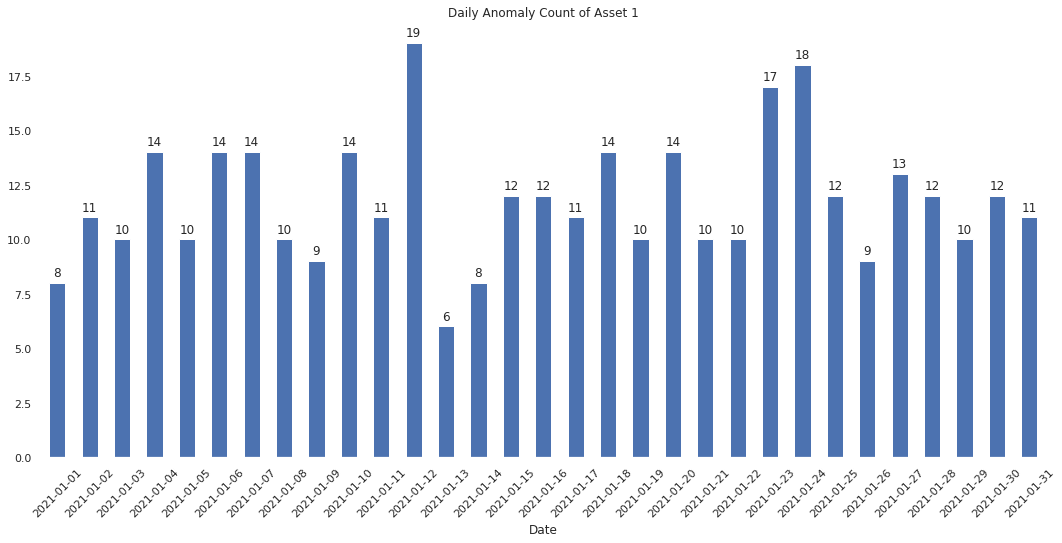

In [78]:
ax = df_1[df_1['anomaly'] == 1].groupby(df_1["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 1")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 2

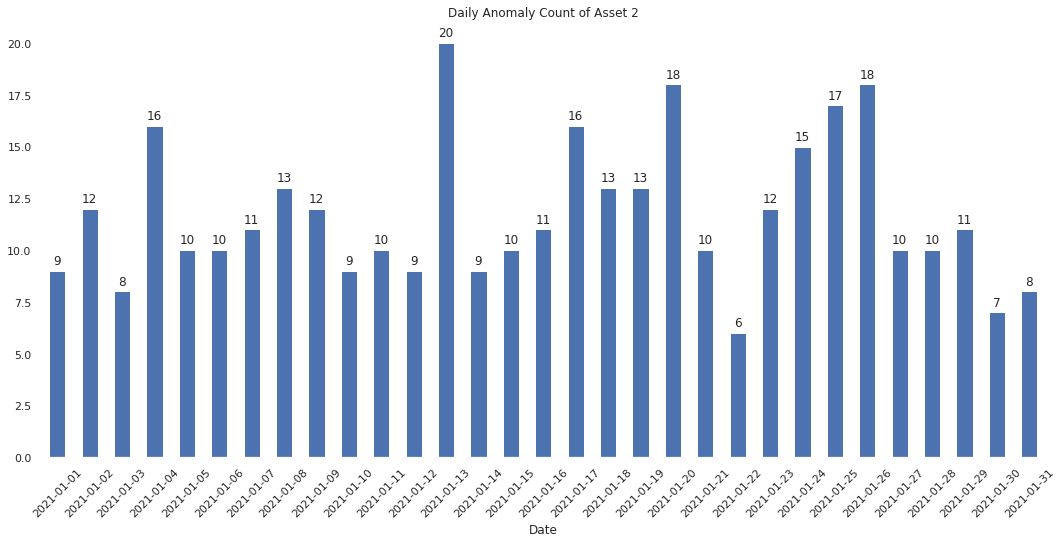

In [79]:
ax = df_2[df_2['anomaly'] == 1].groupby(df_2["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 2")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 3

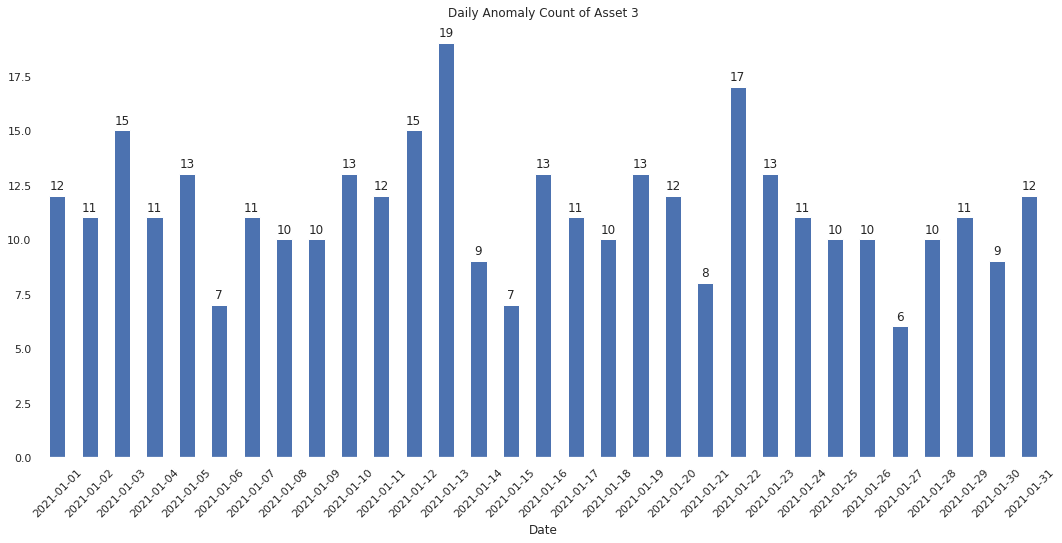

In [80]:
ax = df_3[df_3['anomaly'] == 1].groupby(df_3["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 3")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 4

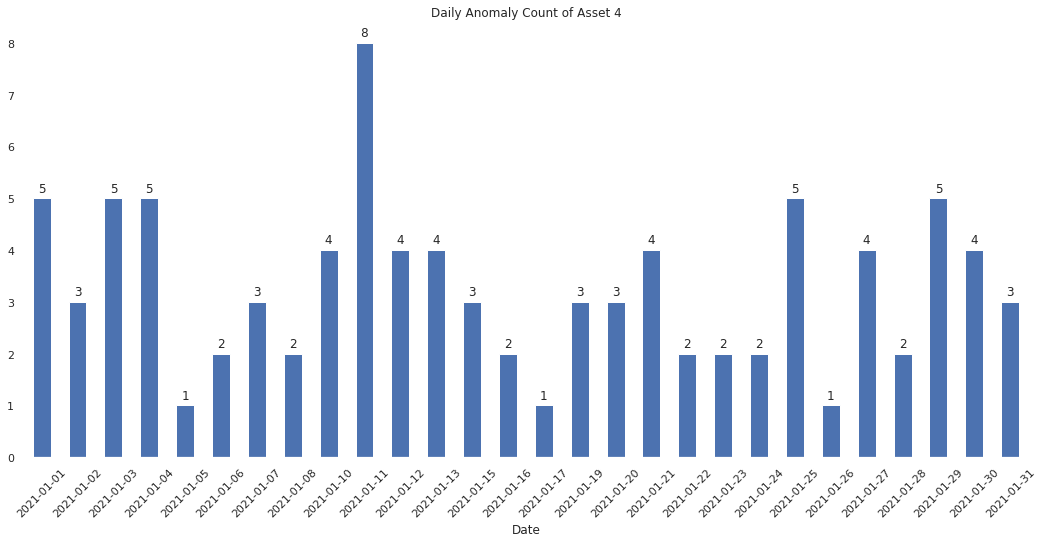

In [81]:
ax = df_4[df_4['anomaly'] == 1].groupby(df_4["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 4")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 5

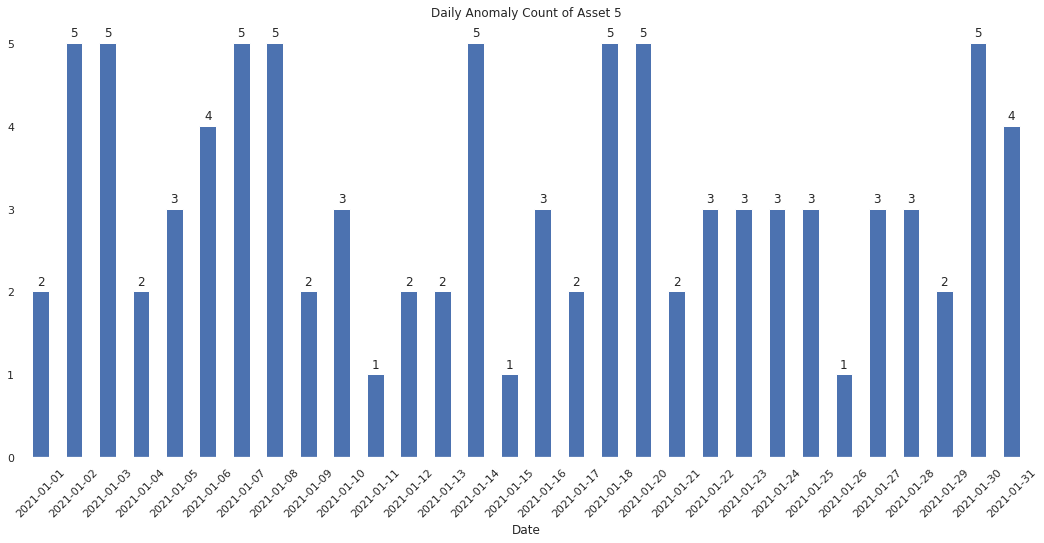

In [82]:
ax = df_5[df_5['anomaly'] == 1].groupby(df_5["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 5")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 6

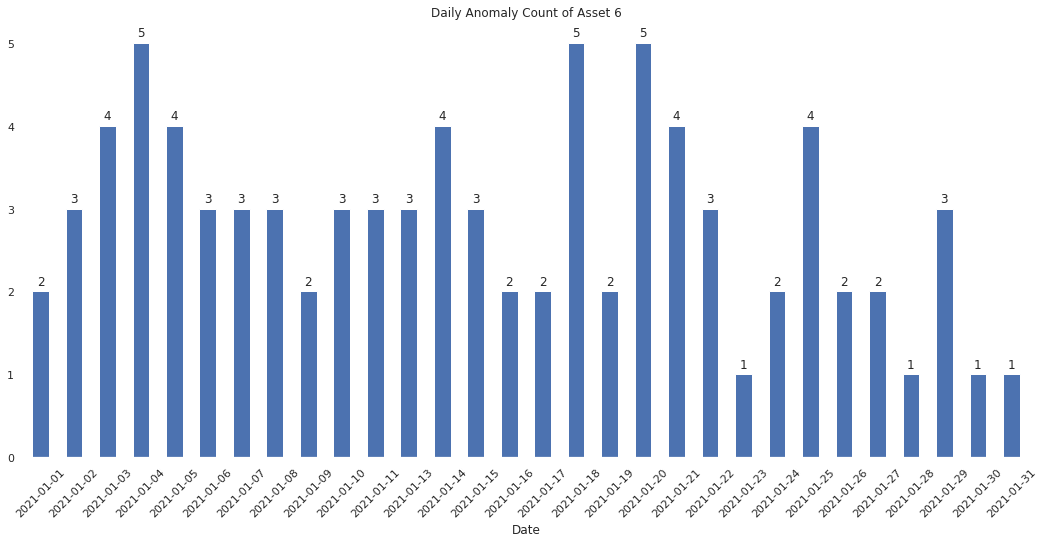

In [83]:
ax = df_6[df_6['anomaly'] == 1].groupby(df_6["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 6")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 7

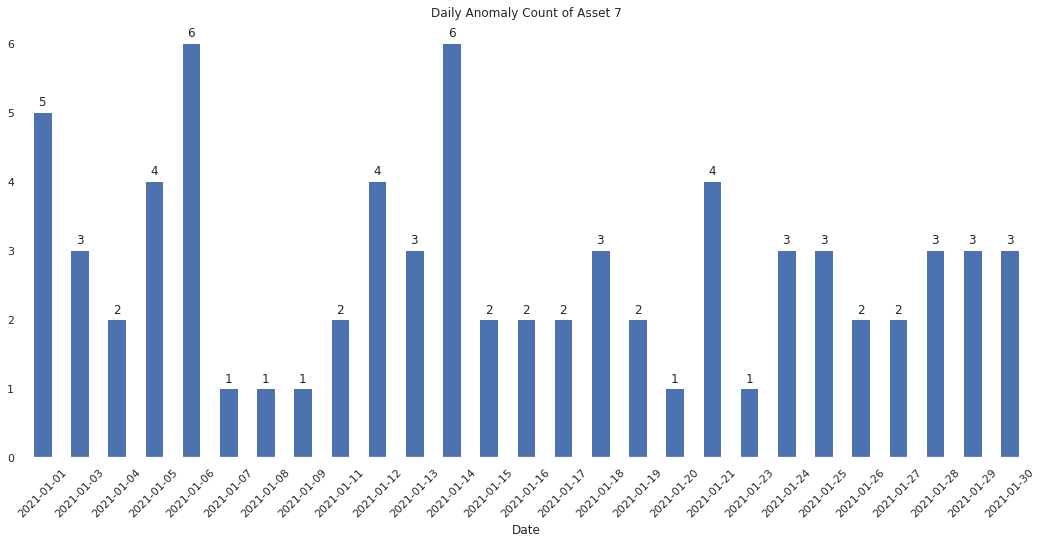

In [84]:
ax = df_7[df_7['anomaly'] == 1].groupby(df_7["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 7")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 8

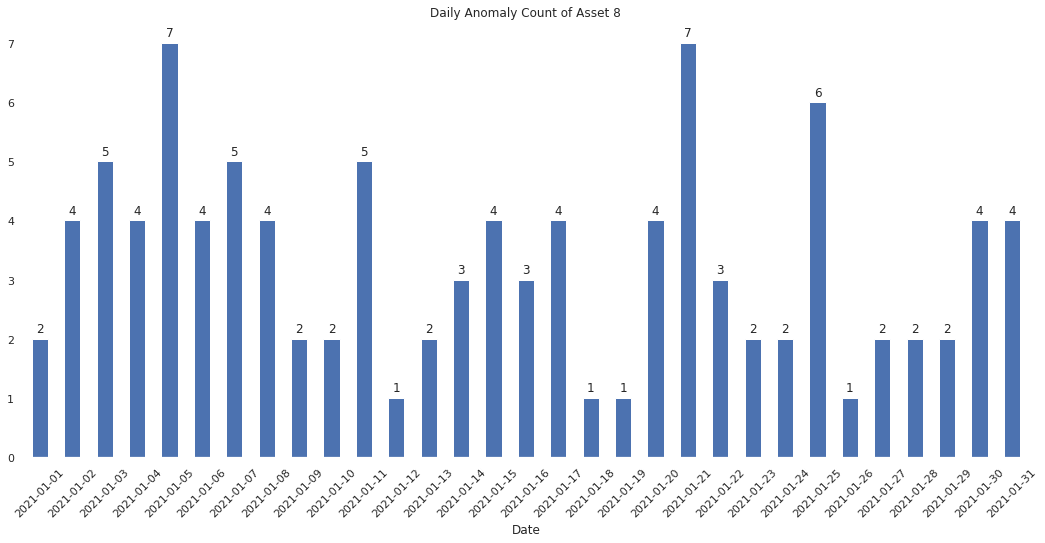

In [85]:
ax = df_8[df_8['anomaly'] == 1].groupby(df_8["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 8")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 9

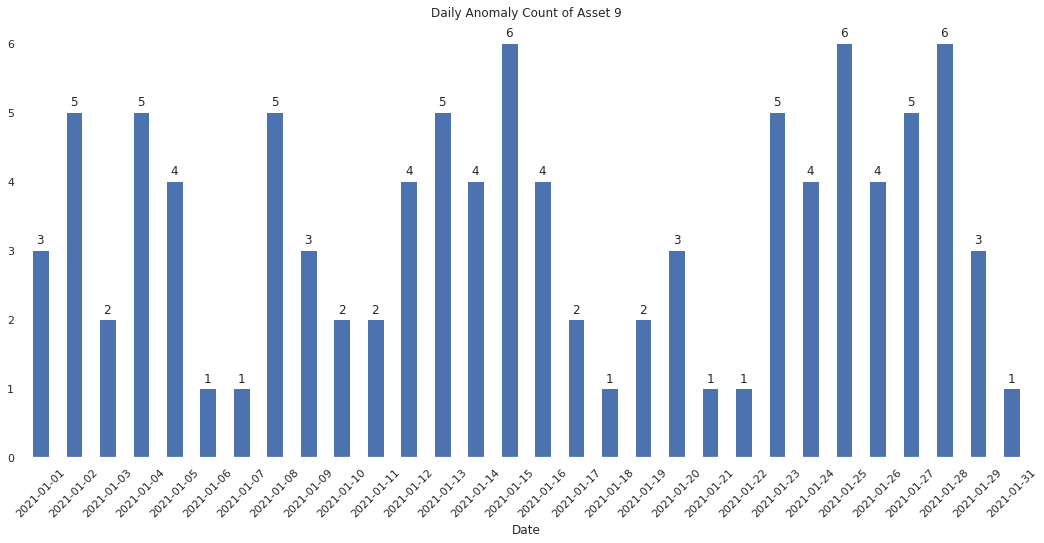

In [86]:
ax = df_9[df_9['anomaly'] == 1].groupby(df_9["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 9")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()

Asset 10

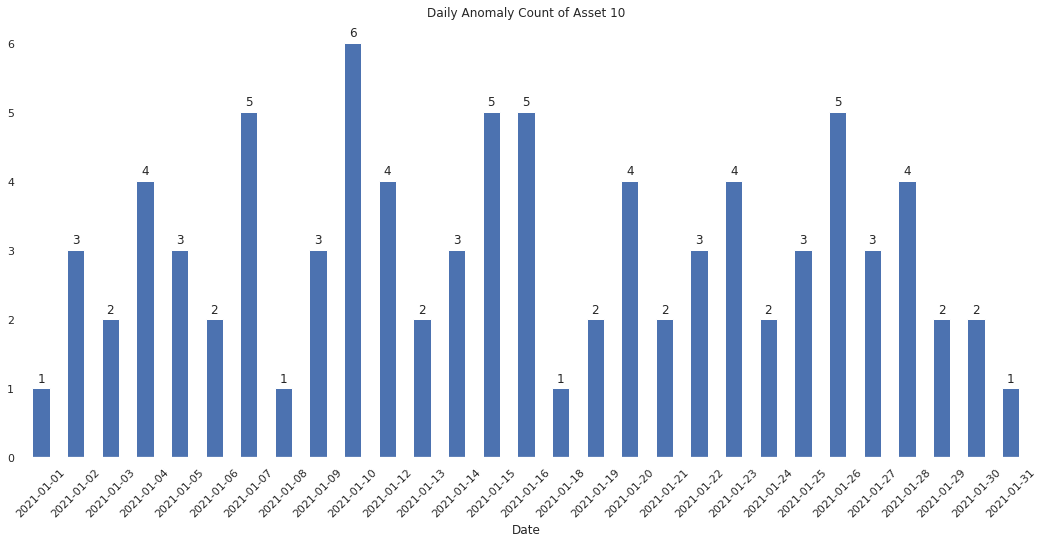

In [87]:
ax = df_10[df_10['anomaly'] == 1].groupby(df_10["Timestamp"].dt.date, sort=False)['anomaly'].count().plot(kind='bar', rot=45)
plt.xlabel("Date")
plt.title("Daily Anomaly Count of Asset 10")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points')
ax.set_facecolor('white')
plt.show()